# 📊 **Exploratory Data Analysis (EDA) for Online Retail II**
## **Data Science and Machine Learning Bootcamp – Ironhack Puerto Rico**
### 📓 Notebook: `2_eda_online_retail_ii.ipynb`
📅 **Date:** December 20, 2024  
👩‍💻 **Author:** Ginosca Alejandro Dávila  

---

## **📌 Notebook Overview**

This notebook performs an in-depth **Exploratory Data Analysis (EDA)** using the cleaned transactional data from the **Online Retail II** dataset.

🔁 _This EDA serves as a foundational step for segmentation and sales performance analysis, including RFM modeling and customer clustering._  
📓 For full project scope and data cleaning steps, refer to the previous notebook: `1_data_cleaning_online_retail_ii.ipynb`.

---

We aim to uncover key patterns in:
- 🛒 **Sales performance** over time  
- 🌍 **Country-level revenue**  
- 👤 **Customer behavior** and segmentation  
- 📦 **Top-performing products**  

This EDA directly supports the SQL-based analysis in `3_sql_analysis_sales_performance.ipynb`, where we re-answer these same business questions using relational queries.

---

## **🧠 Business Questions Answered in Both EDA and SQL**

To enable direct comparison, this notebook is organized to align with the following 12 core business questions also answered in SQL:

### 📈 Sales Performance
1. What is the monthly revenue trend from 2009 to 2011?  
2. What are the top 10 best-selling products by total revenue?  
3. Which invoices had the highest total transaction value?  

### 🌍 Country & Regional Insights  
4. Which countries generate the most revenue?  
5. Do customer behaviors differ by country? *(e.g., avg. spend or frequency)*

### 👤 Customer Insights  
6. How many customers made only one purchase?  
7. What is the average order value per customer?  
8. Who are the top 10 customers by total spend?

### 🧠 Customer Segmentation (RFM Analysis)  
9. How recently has each customer made a purchase? *(Recency)*  
10. How frequently has each customer purchased? *(Frequency)*  
11. How much revenue has each customer generated? *(Monetary)*  
12. How can we segment customers based on RFM scores?

---

## **📂 Input Data**

📁 `cleaned_data/`  
This folder contains cleaned datasets from `1_data_cleaning_online_retail_ii.ipynb`, including:

- ✅ `cleaned_online_retail_II.csv` → Flat file used in this notebook  
- ✅ `customers.csv` → 1 row per customer  
- ✅ `products.csv` → Unique product catalog  
- ✅ `invoices.csv` → One row per invoice  
- ✅ `invoice_items.csv` → One row per product line in each invoice  

> 📌 **Note**: This notebook uses only `cleaned_online_retail_II.csv`. The relational tables are used exclusively in the SQL analysis notebook.

---

## **💾 EDA Outputs Saved**

📁 `eda_outputs/`  
├── 📂 `plots/` → All `.png` chart files  
├── 📂 `data/` → Summary and aggregation `.csv` files  

These saved charts and aggregated datasets are used again for:
- Direct comparison in `3_sql_analysis_sales_performance.ipynb` (EDA vs SQL results)  
- Optional reuse in future segmentation work (e.g., RFM SQL implementation)

---

## **🎯 Goals**

✔ Identify **sales patterns** and **seasonal trends**  
✔ Understand **regional differences in behavior**  
✔ Pinpoint **high-value customers and products**  
✔ Support **SQL query development** and **segmentation logic**  

---

🔍 **Let’s begin exploring the Online Retail II dataset!**


---

## 📂 Step 1: Mount Google Drive

To begin, we need to mount Google Drive to access the project folder and load the cleaned flat dataset:

📁 `My Drive > Colab Notebooks > Ironhack > Week 3 > Week 3 - Day 4 > project-2-eda-sql > retail-sales-segmentation-sql > cleaned_data`

This notebook uses the following file for all EDA steps:

- ✅ `cleaned_online_retail_II.csv` → Full cleaned dataset in flat structure (used throughout this notebook)

> 🔍 **Note**: While normalized tables (`customers.csv`, `products.csv`, `invoices.csv`, `invoice_items.csv`) were also exported during data cleaning, they are **not used** here. Those are exclusively used in the SQL notebook (`3_sql_analysis_sales_performance.ipynb`).

---

In [1]:
import sys
import os

# ✅ Safe print to avoid encoding issues in some terminals
def safe_print(text):
    try:
        print(text)
    except UnicodeEncodeError:
        print(text.encode("ascii", errors="ignore").decode())

# ✅ Check if running inside Google Colab
def is_colab():
    return 'google.colab' in sys.modules

# 🔧 Set base path depending on environment
if is_colab():
    from google.colab import drive
    drive.mount('/content/drive')

    # ✅ Default project path in Colab
    default_path = 'MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql'
    full_default_path = os.path.join('/content/drive', default_path)

    if os.path.exists(full_default_path):
        project_base_path = full_default_path
        safe_print(f"✅ Colab project path set to: {project_base_path}")
    else:
        safe_print("\n📂 Default path not found. Please input the relative path to your project inside Google Drive.")
        safe_print("👉 Example: 'MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql'")
        user_path = input("📥 Your path: ").strip()
        project_base_path = os.path.join('/content/drive', user_path)

        if not os.path.exists(project_base_path):
            raise FileNotFoundError(f"❌ Path does not exist: {project_base_path}\nPlease check your input.")

        safe_print(f"✅ Colab project path set to: {project_base_path}")

else:
    try:
        script_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        script_dir = os.getcwd()

    # Automatically walk up until project root (contains 'data/' and 'notebooks/')
    levels_up = 0
    while levels_up < 5:
        potential_root = os.path.abspath(os.path.join(script_dir, *(['..'] * levels_up)))
        if os.path.isdir(os.path.join(potential_root, 'data')) and os.path.isdir(os.path.join(potential_root, 'notebooks')):
            project_base_path = potential_root
            break
        levels_up += 1
    else:
        raise FileNotFoundError("❌ Project root folder not found. Ensure it contains 'data' and 'notebooks' folders.")

    safe_print(f"✅ Local environment detected. Base path set to: {project_base_path}")


Mounted at /content/drive
✅ Colab project path set to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql


---

## 🧰 Step 2: Import Libraries and Load Cleaned Dataset

Next, we’ll import the libraries required for data manipulation and visualization.  
Then, we’ll load the cleaned flat dataset that was exported in the previous notebook:

- ✅ `cleaned_online_retail_II.csv` → Full cleaned transactional data with no missing values or canceled orders.

This file provides a reliable foundation for EDA, aggregation, and customer segmentation.  

> 🧠 **Note**: The normalized relational tables (`customers.csv`, `products.csv`, `invoices.csv`, `invoice_items.csv`) are used exclusively in the SQL notebook:  
> 📓 `3_sql_analysis_sales_performance.ipynb`, which answers the same business questions using relational queries.

---


In [2]:
# 📦 Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# 🧼 Aesthetic setup for plots
plt.style.use("ggplot")
sns.set_palette("pastel")

# 📁 Define path to cleaned flat dataset
clean_path = os.path.join(project_base_path, 'cleaned_data')
full_data_path = os.path.join(clean_path, 'cleaned_online_retail_II.csv')

# 📥 Load the flat dataset with error handling
try:
    cleaned_full_df = pd.read_csv(full_data_path, parse_dates=['invoice_date'])

    safe_print("✅ Cleaned flat dataset loaded successfully.")
    safe_print(f"cleaned_full_df shape: {cleaned_full_df.shape}")

except FileNotFoundError as e:
    safe_print(f"❌ File not found: {e}")
    sys.exit(1)


✅ Cleaned flat dataset loaded successfully.
cleaned_full_df shape: (766226, 9)


---

### ✅ Cleaned Dataset Loaded Successfully

The cleaned flat file `cleaned_online_retail_II.csv` has been successfully loaded from the `cleaned_data/` directory.

This dataset contains:
- One row per **transaction line** (i.e., each product sold in an invoice)
- All relevant fields merged from the original source, including:
  - `invoice_no`, `stock_code`, `description`, `quantity`
  - `invoice_date`, `unit_price`, `customer_id`, `country`, `line_revenue`

This flat structure is ideal for **exploratory analysis**, **visualization**, and **aggregation** using Python.

---


---

## 🧾 Step 3: Dataset Preview & Structure Overview

In this step, we’ll inspect the structure of the main flat dataset:  
📄 `cleaned_online_retail_II.csv`

We’ll review:
- The **first and last few rows** (sample data preview)  
- The **shape** of the dataset (rows × columns)  
- **Column names**, **data types**, and **non-null counts**  
- Any **missing values** and their distribution

This structure validation helps confirm that the dataset was exported properly and is ready for analysis.


---

In [3]:
import io

# ✅ Display fallback for script environments
try:
    display
except NameError:
    def display(x):
        print(x.to_string() if isinstance(x, pd.DataFrame) else str(x))

# 🔍 Helper function to inspect a DataFrame’s basic structure
def inspect_basic_structure(df, name="Dataset", preview_rows=5):
    """
    Display structure, sample rows, missing values, and schema of a DataFrame.
    Compatible with both notebooks and terminal scripts.
    """
    safe_print(f"🧾 Inspecting: {name}")
    safe_print("=" * 60)

    # 👁️ Preview first N rows
    safe_print(f"🔹 First {preview_rows} Rows:")
    display(df.head(preview_rows))

    # 👁️ Preview last N rows
    safe_print(f"\n🔹 Last {preview_rows} Rows:")
    display(df.tail(preview_rows))

    # 📐 Dataset shape
    safe_print(f"\n🔹 Shape: {df.shape[0]} rows × {df.shape[1]} columns")

    # 🏷️ Column names
    safe_print("\n🔹 Column Names:")
    safe_print(df.columns.tolist())

    # 🧬 Data types and non-null counts
    safe_print("\n🔹 Data Types and Non-Null Counts:")
    buffer = io.StringIO()
    df.info(buf=buffer)
    safe_print(buffer.getvalue())

    # 🧼 Missing values per column
    safe_print("🔸 Missing Values (per column):")
    missing_summary = df.isnull().sum()
    display(missing_summary[missing_summary > 0] if missing_summary.any() else "✅ No missing values.")

    safe_print("=" * 60 + "\n")


In [4]:
# 🧪 Inspect structure and content of the cleaned_full_df DataFrame
inspect_basic_structure(cleaned_full_df, name="cleaned_online_retail_II.csv")


🧾 Inspecting: cleaned_online_retail_II.csv
🔹 First 5 Rows:


,invoice_no,stock_code,description,unit_price,quantity,line_revenue,invoice_date,customer_id,country
0,489434,21232,strawberry ceramic trinket box,1.25,24,30.0,2009-12-01 07:45:00,13085,united kingdom
1,489434,21523,doormat fancy font home sweet home,5.95,10,59.5,2009-12-01 07:45:00,13085,united kingdom
2,489434,21871,save the planet mug,1.25,24,30.0,2009-12-01 07:45:00,13085,united kingdom
3,489434,22041,"record frame 7"" single size",2.10,48,100.8,2009-12-01 07:45:00,13085,united kingdom
4,489434,22064,pink doughnut trinket pot,1.65,24,39.6,2009-12-01 07:45:00,13085,united kingdom



🔹 Last 5 Rows:


,invoice_no,stock_code,description,unit_price,quantity,line_revenue,invoice_date,customer_id,country
766221,581587,22730,alarm clock bakelike ivory,3.75,4,15.0,2011-12-09 12:50:00,12680,france
766222,581587,22899,children's apron dolly girl,2.10,6,12.6,2011-12-09 12:50:00,12680,france
766223,581587,23254,childrens cutlery dolly girl,4.15,4,16.6,2011-12-09 12:50:00,12680,france
766224,581587,23255,childrens cutlery circus parade,4.15,4,16.6,2011-12-09 12:50:00,12680,france
766225,581587,23256,childrens cutlery spaceboy,4.15,4,16.6,2011-12-09 12:50:00,12680,france



🔹 Shape: 766226 rows × 9 columns

🔹 Column Names:
['invoice_no', 'stock_code', 'description', 'unit_price', 'quantity', 'line_revenue', 'invoice_date', 'customer_id', 'country']

🔹 Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766226 entries, 0 to 766225
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    766226 non-null  int64         
 1   stock_code    766226 non-null  object        
 2   description   766226 non-null  object        
 3   unit_price    766226 non-null  float64       
 4   quantity      766226 non-null  int64         
 5   line_revenue  766226 non-null  float64       
 6   invoice_date  766226 non-null  datetime64[ns]
 7   customer_id   766226 non-null  int64         
 8   country       766226 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 52.6+ MB

🔸 Missing Values (per column):


'✅ No missing values.'

---

### 🧾 Summary: `cleaned_online_retail_II.csv`

The dataset has been successfully loaded and contains **766,226 rows** and **9 columns**, with each row representing an item-level transaction within an invoice.

Key observations:

- ✅ **No missing values** — all fields are clean and analysis-ready  
- 📅 `invoice_date` is correctly parsed as a `datetime64[ns]` object  
- 💰 `line_revenue` (calculated as `quantity × unit_price`) is included and ready for revenue analysis  
- 🔤 Categorical text fields like `description` and `country` are stored as `object` types  
- 🧾 Identifiers such as `invoice_no`, `stock_code`, and `customer_id` are correctly typed as integers or strings

This flat, denormalized dataset will be the primary source for all **exploratory**, **time-based**, **customer-level**, and **product-level** insights in this notebook.

---


---

## 🧩 Step 4: Variable Classification – `cleaned_online_retail_II.csv`

In this step, we classify the columns from the cleaned full dataset into one of four roles:

- 🆔 **Identifiers** – Unique keys or foreign keys used for grouping or tracking  
- 🔤 **Categorical** – Labels or text fields used for grouping, filtering, or segmentation  
- 📊 **Quantitative** – Numeric columns used for aggregations or distribution analysis  
- 📅 **Datetime** – Timestamps used for time-based trend analysis

This classification helps define how each variable should be handled during EDA and downstream modeling.

📄 **Dataset:** `cleaned_online_retail_II.csv`  
🔢 **Shape:** 766,226 rows × 9 columns
📝 **Note:** This dataset includes one row per item line in a transaction and will serve as the **primary source** for all EDA and business question analysis.

We’ll now define column roles explicitly for clarity.


---

In [5]:
# 🧠 Variable classification for cleaned_full_df only
variable_types = {
    'cleaned_online_retail_II': {
        'identifier': ['invoice_no', 'stock_code', 'customer_id'],
        'categorical': ['description', 'country'],
        'quantitative': ['quantity', 'unit_price', 'line_revenue'],
        'datetime': ['invoice_date']
    }
}

# ✅ Display summary
safe_print("✅ Variable classification completed:\n")

for dataset, types in variable_types.items():
    safe_print(f"📄 Dataset: {dataset}")
    for var_type, columns in types.items():
        safe_print(f"  {var_type.title()} Columns:")
        if columns:
            for col in columns:
                safe_print(f"    • {col}")
        else:
            safe_print("    (None)")
    safe_print("")


✅ Variable classification completed:

📄 Dataset: cleaned_online_retail_II
  Identifier Columns:
    • invoice_no
    • stock_code
    • customer_id
  Categorical Columns:
    • description
    • country
  Quantitative Columns:
    • quantity
    • unit_price
    • line_revenue
  Datetime Columns:
    • invoice_date



---

### 🧾 Summary: Variable Classification

We’ve classified all variables from the primary dataset `cleaned_online_retail_II.csv` into one of four roles:

- 🆔 Identifier columns  
- 🔤 Categorical columns  
- 📊 Quantitative columns  
- 📅 Datetime columns  

This classification guides appropriate transformations, aggregations, and visualizations for EDA.

---

#### 📄 `cleaned_online_retail_II.csv`

| Variable        | Type         |
|-----------------|--------------|
| `invoice_no`    | Identifier   |
| `stock_code`    | Identifier   |
| `customer_id`   | Identifier   |
| `description`   | Categorical  |
| `country`       | Categorical  |
| `quantity`      | Quantitative |
| `unit_price`    | Quantitative |
| `line_revenue`  | Quantitative |
| `invoice_date`  | Datetime     |

---

This structure will help us explore product trends, customer behavior, and time-based performance patterns more effectively in the upcoming steps.

---


---

## 📊 Step 5: Descriptive Statistics for Quantitative Columns

We begin by exploring the central tendency and distribution of the main numeric variables in the dataset:

- `quantity`: Number of units purchased per item  
- `unit_price`: Selling price per unit (in GBP)  
- `line_revenue`: Revenue per item line (`quantity × unit_price`)

These statistics help us assess the scale of transactions and detect potential outliers, which are common in wholesale or bulk order environments.

---


In [6]:
# 🔢 Columns to describe
quantitative_cols = ['quantity', 'unit_price', 'line_revenue']

# 📊 Summary statistics
safe_print("📊 Summary Statistics for Quantitative Columns:\n")
display(cleaned_full_df[quantitative_cols].describe())

# 🔍 Check for zero or negative values (if any remain)
safe_print("\n🔍 Number of rows with non-positive values:")
for col in quantitative_cols:
    count = (cleaned_full_df[col] <= 0).sum()
    safe_print(f"  • {col}: {count}")


📊 Summary Statistics for Quantitative Columns:



,quantity,unit_price,line_revenue
count,766226.000000,766226.000000,766226.000000
mean,13.701974,2.947758,22.277422
std,147.329447,4.349302,227.462120
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,5.000000
50%,6.000000,1.950000,12.500000
75%,12.000000,3.750000,19.800000
max,80995.000000,649.500000,168469.600000



🔍 Number of rows with non-positive values:
  • quantity: 0
  • unit_price: 0
  • line_revenue: 0


---

### 📊 Summary: Quantitative Variables

The table below summarizes the distribution of all numeric columns in `cleaned_online_retail_II.csv`.

| Metric       | `quantity` | `unit_price` | `line_revenue` |
|--------------|------------|--------------|----------------|
| **Count**    | 766,226    | 766,226      | 766,226        |
| **Mean**     | 13.70      | £2.95        | £22.28         |
| **Std Dev**  | 147.33     | £4.35        | £227.46        |
| **Min**      | 1          | £0.001       | £0.001         |
| **25%**      | 2          | £1.25        | £5.00          |
| **Median**   | 6          | £1.95        | £12.50         |
| **75%**      | 12         | £3.75        | £19.80         |
| **Max**      | 80,995     | £649.50      | £168,469.60    |

Key insights:

- ⚠️ **Extreme outliers** are present, especially in `quantity` and `line_revenue`. These likely correspond to large wholesale orders.
- ✅ No zero or negative values — all numeric entries are valid for analysis.
- 💰 Most transactions involve **low quantities** and **low unit prices**, with a **median total price of ~£12.50**.

We’ll now visualize these distributions to assess skewness and decide if transformations (like `log1p`) are needed.

---


---

## 📊 Step 6: Distribution of Quantitative Variables (with Frequency Tables)

To explore the behavior and skewness of our main numeric fields, we analyze:

- 📋 **Frequency Tables** (before each chart):
  - First, the raw values
  - Then, log-transformed values using `log1p()` to reduce skewness and compress outliers

- 📈 **Histograms** (side-by-side):
  - Left: Raw distribution
  - Right: Log-transformed distribution

These tables and visualizations allow us to:
- Understand which values dominate each variable
- Spot long-tailed or right-skewed distributions
- Justify the use of log transformation for outlier-heavy variables

Each histogram pair is saved in the project under:  
📁 `eda_outputs/plots/`

> 📌 **Insight Tip**: If most of the data falls in the first few bins and only a handful in the rest, the variable is highly skewed and may benefit from transformation or trimming for modeling.

---



📋 Frequency Table for: quantity


,count
quantity,
"(-79.994, 5400.6]",766202
"(5400.6, 10800.2]",16
"(10800.2, 16199.8]",5
"(16199.8, 21599.4]",1
"(21599.4, 26999.0]",0
"(26999.0, 32398.6]",0
"(32398.6, 37798.2]",0
"(37798.2, 43197.8]",0
"(43197.8, 48597.4]",0



📋 Frequency Table for: log1p(quantity)


,count
quantity,
"(0.683, 1.4]",297044
"(1.4, 2.108]",158804
"(2.108, 2.815]",184328
"(2.815, 3.522]",79855
"(3.522, 4.229]",25290
"(4.229, 4.937]",13059
"(4.937, 5.644]",5000
"(5.644, 6.351]",1966
"(6.351, 7.059]",631


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/01_quantity_distribution.png


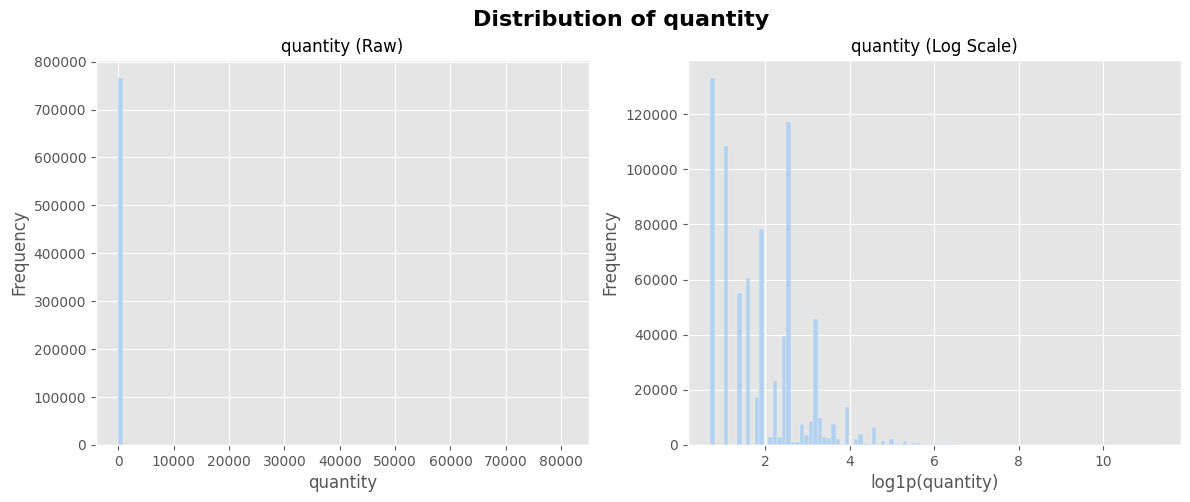


📋 Frequency Table for: unit_price


,count
unit_price,
"(-0.648, 43.301]",765824
"(43.301, 86.601]",222
"(86.601, 129.901]",79
"(129.901, 173.201]",47
"(173.201, 216.501]",11
"(216.501, 259.801]",0
"(259.801, 303.101]",40
"(303.101, 346.4]",0
"(346.4, 389.7]",1



📋 Frequency Table for: log1p(unit_price)


,count
unit_price,
"(-0.00548, 0.433]",65709
"(0.433, 0.865]",200889
"(0.865, 1.296]",224221
"(1.296, 1.728]",134777
"(1.728, 2.16]",78662
"(2.16, 2.592]",45394
"(2.592, 3.023]",14758
"(3.023, 3.455]",966
"(3.455, 3.887]",501


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/02_unit_price_distribution.png


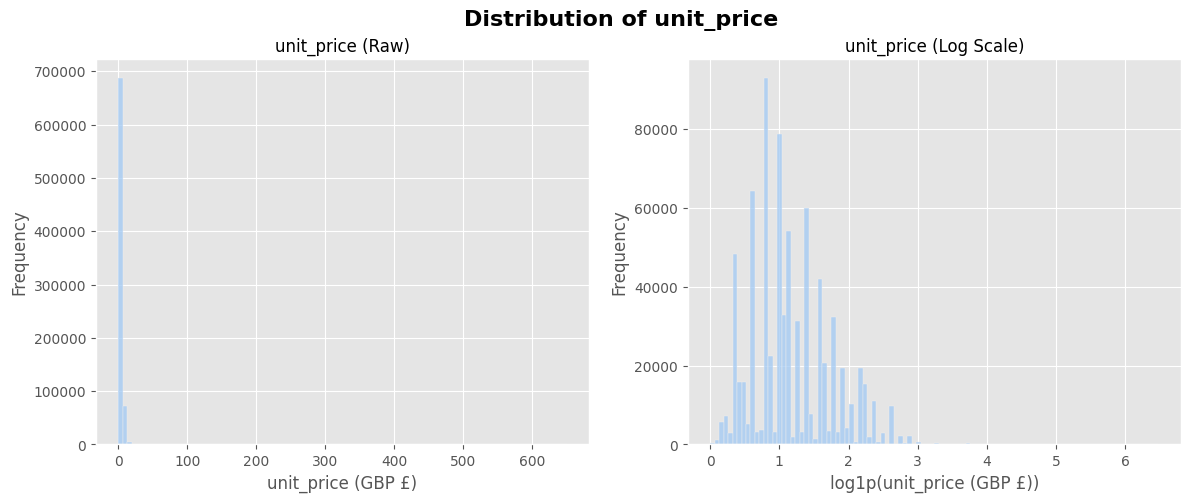


📋 Frequency Table for: line_revenue


,count
line_revenue,
"(-168.469, 11231.308]",766222
"(11231.308, 22462.614]",1
"(22462.614, 33693.921]",0
"(33693.921, 44925.227]",1
"(44925.227, 56156.534]",0
"(56156.534, 67387.841]",0
"(67387.841, 78619.147]",1
"(78619.147, 89850.454]",0
"(89850.454, 101081.76]",0



📋 Frequency Table for: log1p(line_revenue)


,count
line_revenue,
"(-0.011, 0.803]",22026
"(0.803, 1.605]",133511
"(1.605, 2.408]",173553
"(2.408, 3.21]",300128
"(3.21, 4.012]",88671
"(4.012, 4.814]",31220
"(4.814, 5.617]",12446
"(5.617, 6.419]",3439
"(6.419, 7.221]",895


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/03_line_revenue_distribution.png


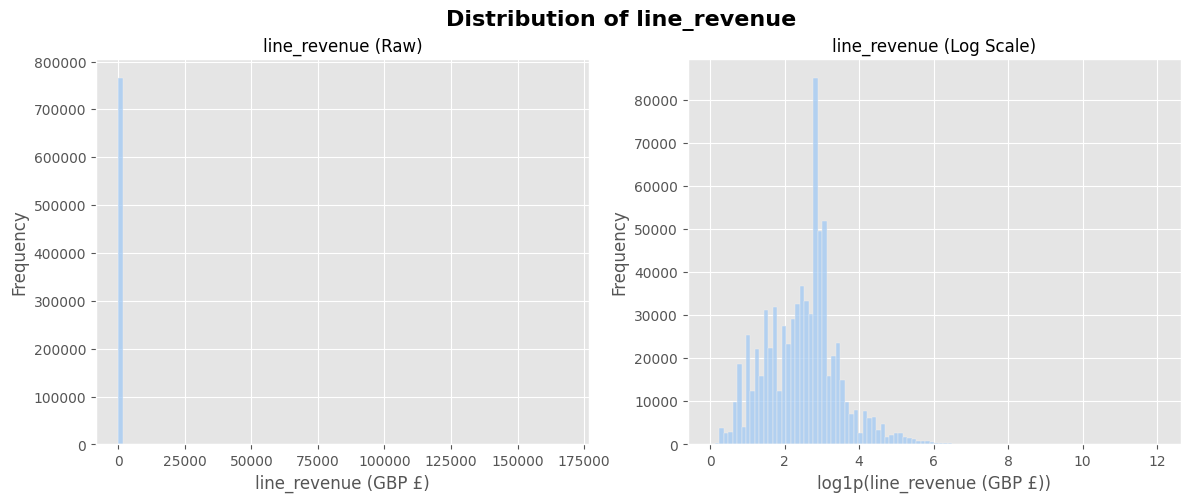

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 📦 Setup
OVERWRITE_PLOTS = True
plot_export_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(plot_export_dir, exist_ok=True)

# 🔢 Quantitative columns to analyze
quant_cols = ['quantity', 'unit_price', 'line_revenue']
plot_index = 1

# 📋 Frequency table helper
def display_frequency_table(series, label, bins=15, log_scale=False):
    title = f"log1p({label})" if log_scale else label
    safe_print(f"\n📋 Frequency Table for: {title}")
    safe_print("=" * 50)

    # Transform if log
    data = np.log1p(series) if log_scale else series

    if pd.api.types.is_integer_dtype(data) and data.nunique() < 50:
        freq_table = data.value_counts().sort_index()
    else:
        freq_table = pd.cut(data, bins=bins).value_counts().sort_index()

    display(freq_table)

# 🔁 Loop through columns
for col in quant_cols:
    series = cleaned_full_df[col]

    # 📋 Raw frequency table
    display_frequency_table(series, col, bins=15, log_scale=False)

    # 📋 Log1p frequency table
    display_frequency_table(series, col, bins=15, log_scale=True)

    # 🎨 Plot setup
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Distribution of {col}', fontsize=16, fontweight='bold')

    # Axis label with units
    if col in ['unit_price', 'line_revenue']:
        x_label = f"{col} (GBP £)"
    else:
        x_label = col

    # Raw histogram
    sns.histplot(series, bins=100, ax=axes[0], kde=False)
    axes[0].set_title(f'{col} (Raw)', fontsize=12)
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel('Frequency')

    # Log-transformed histogram
    sns.histplot(np.log1p(series), bins=100, ax=axes[1], kde=False)
    axes[1].set_title(f'{col} (Log Scale)', fontsize=12)
    axes[1].set_xlabel(f'log1p({x_label})')
    axes[1].set_ylabel('Frequency')

    # Save plot
    plot_filename = f"{plot_index:02d}_{col}_distribution.png"
    plot_path = os.path.join(plot_export_dir, plot_filename)
    if OVERWRITE_PLOTS or not os.path.exists(plot_path):
        plt.savefig(plot_path)
        safe_print(f"✅ Saved plot: {plot_path}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {plot_path}")

    plt.show()
    plot_index += 1


---

### 📊 Summary: Distribution Analysis

We examined the distribution of the three main quantitative variables in `cleaned_online_retail_II.csv` using both raw and log-transformed views.

| Column         | Key Characteristics |
|----------------|----------------------|
| `quantity`     | Right-skewed distribution. Most transactions fall below **5,400 units**, with just **two extreme outliers** reaching the max of **80,995 units**. |
| `unit_price`   | Most products are priced under **£43**, though there are rare outliers up to **£649.50**. |
| `line_revenue` | Nearly all transaction lines are under **£11,231**, with a handful of extreme outliers — the largest reaching **£168,469.60**. |

Each variable was analyzed through:
- 📋 **Raw frequency tables**
- 📋 **Log-transformed frequency tables** using `log1p()`
- 📈 **Histograms** (raw and log scale)

These analyses help visualize skewness, support outlier detection, and guide the decision to apply log transformations in downstream modeling.

---

### ✅ Outputs Saved

All plots were saved under:

📁 `eda_outputs/plots/`  
File names:
- `01_quantity_distribution.png`  
- `02_unit_price_distribution.png`  
- `03_line_revenue_distribution.png`

These visuals support the upcoming steps for analyzing trends, customer behavior, and product performance.

---


---

## 🧠 Step 7: Begin Answering Business Questions (EDA Perspective)

Now that we’ve completed the core Exploratory Data Analysis (EDA), we’ll begin applying it to directly answer the **12 business questions** outlined in our SQL-based analysis notebook:  
📓 `3_sql_analysis_sales_performance.ipynb`

In this section, we’ll use Python and Pandas to answer the same questions for comparison and validation.

We will explore:

- 📈 **Sales performance** across time, customers, and products  
- 🌍 **Country-level insights**  
- 👤 **Customer purchasing behavior**  
- 🧮 **Customer segmentation using RFM metrics**

> 🧩 Note: If a question has already been addressed during general EDA, we will reference the earlier section and avoid repeating identical plots or calculations.  
>  
> 📁 Outputs from this section are saved in `eda_outputs/plots/` and `eda_outputs/data/` for consistency across notebooks and dashboards.

---

### 🚀 Let’s begin by aligning with the first business question on monthly revenue trends!


---

## 📈 Q1: Monthly Revenue Trend (2009–2011)

To identify trends and seasonality in overall business performance, we calculate the **monthly revenue** by aggregating `line_revenue` for each calendar month.

### 🧮 Methodology
- Convert `invoice_date` to `YYYY-MM` format
- Group by month
- Aggregate:
  - Total revenue: sum of `line_revenue`
  - Invoice count per month
  - Average revenue per invoice
- Format month labels for readability (e.g., `2009-12`)
- Mark **December 2011** with an asterisk (`*`) to indicate it's a **partial month**
- Add vertical lines to separate each year

> 📂 Output:
> - Data export: `eda_outputs/data/01_monthly_revenue_trend.csv`
> - Plot export: `eda_outputs/plots/04_monthly_revenue_trend.png`

This analysis helps highlight:
- Seasonal peaks (e.g., **Q4 holiday surges**)
- Long-term revenue trends across years
- The **partial nature of the final month**, which must be accounted for when interpreting the final drop in revenue

---


✅ Exported summary: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/01_monthly_revenue_summary.csv


,invoice_month_str,monthly_revenue,monthly_invoices,avg_revenue_per_invoice
0,2009-12,678029.570,1502,451.417823
1,2010-01,533802.982,963,554.312546
2,2010-02,497937.576,1093,455.569603
3,2010-03,665973.671,1509,441.334441
4,2010-04,585149.932,1316,444.642805
5,2010-05,592734.130,1365,434.237458
6,2010-06,629540.450,1482,424.791127
7,2010-07,581487.960,1362,426.936828
8,2010-08,594561.170,1276,465.957030
9,2010-09,805544.811,1659,485.560465



📝 Note: Months marked with * are partial months.
- 2011-12: Data available only up to December 9th.

✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/04_monthly_revenue_trend.png


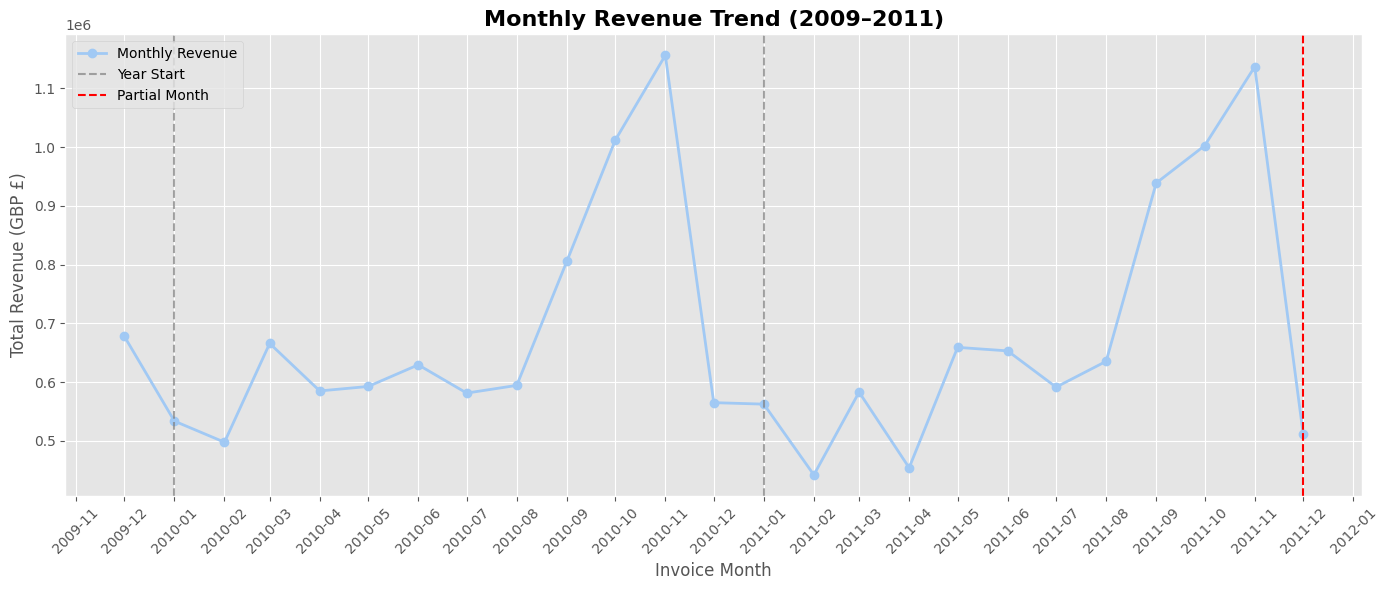

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates

# ✅ Setup export behavior
OVERWRITE_PLOTS = True
OVERWRITE_CSV = True
plot_index = 4
data_index = 1

# 📁 Define output directories
plot_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
data_dir = os.path.join(project_base_path, 'eda_outputs', 'data')
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)

# 📅 Extract invoice_month from invoice_date
cleaned_full_df['invoice_month'] = cleaned_full_df['invoice_date'].dt.to_period('M').dt.to_timestamp()
monthly_summary = cleaned_full_df.groupby('invoice_month').agg(
    monthly_revenue=('line_revenue', 'sum'),
    monthly_invoices=('invoice_no', 'nunique')
).reset_index()
monthly_summary['avg_revenue_per_invoice'] = monthly_summary['monthly_revenue'] / monthly_summary['monthly_invoices']

# 📝 Add label for partial month (December 2011)
monthly_summary['invoice_month_str'] = monthly_summary['invoice_month'].dt.strftime('%Y-%m')
monthly_summary.loc[monthly_summary['invoice_month_str'] == '2011-12', 'invoice_month_str'] += ' *'

# 💾 Export summary table
monthly_data_path = os.path.join(data_dir, f'{data_index:02d}_monthly_revenue_summary.csv')
if OVERWRITE_CSV or not os.path.exists(monthly_data_path):
    monthly_summary.to_csv(monthly_data_path, index=False)
    safe_print(f"✅ Exported summary: {monthly_data_path}")
else:
    safe_print(f"⚠️ Skipped (already exists): {monthly_data_path}")

# 📋 Show the full table
display(monthly_summary[['invoice_month_str', 'monthly_revenue', 'monthly_invoices', 'avg_revenue_per_invoice']])

# 📝 Note about partial month
safe_print("\n📝 Note: Months marked with * are partial months.")
safe_print("- 2011-12: Data available only up to December 9th.\n")

# 📊 Plot monthly revenue trend
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(monthly_summary['invoice_month'], monthly_summary['monthly_revenue'], marker='o', linewidth=2, label='Monthly Revenue')

# 🧭 Format x-axis ticks to show all months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# 📍 Add vertical lines for each new year
for date in monthly_summary['invoice_month']:
    if date.month == 1:
        ax.axvline(date, color='gray', linestyle='--', alpha=0.7, label='Year Start' if date.year == 2010 else "")

# 📍 Mark partial month (Dec 2011)
partial_month = pd.to_datetime('2011-12-01')
ax.axvline(partial_month, color='red', linestyle='--', linewidth=1.5, label='Partial Month')

# 🏷️ Labels and legend
ax.set_title('Monthly Revenue Trend (2009–2011)', fontsize=16, fontweight='bold')
ax.set_xlabel('Invoice Month')
ax.set_ylabel('Total Revenue (GBP £)')
ax.legend()
plt.tight_layout()

# 💾 Save plot
plot_path = os.path.join(plot_dir, f'{plot_index:02d}_monthly_revenue_trend.png')
if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path)
    safe_print(f"✅ Saved plot: {plot_path}")
else:
    safe_print(f"⚠️ Skipped (already exists): {plot_path}")

plt.show()


---

### ❓ Q1. What is the monthly revenue trend from 2009 to 2011?

We calculated the **monthly revenue trend** using the `invoice_date` and `line_revenue` columns from the cleaned dataset.

#### 🔍 Key Insights:
- 📈 **Revenue peaked in November** of both **2010 (£1.16M)** and **2011 (£1.14M)**, reflecting strong **pre-holiday shopping activity**.
- 📉 A consistent **post-holiday dip** is visible in **January and February**, aligning with typical retail seasonality.
- 🔁 The pattern of **Q4 surges** followed by **Q1 slowdowns** shows clear annual seasonality in consumer behavior.
- 📅 The final month, **December 2011**, appears lower due to **partial data** — only sales up to **December 9th** are included. It should not be interpreted as an actual revenue drop.

> These results help identify peak periods and support strategic decisions in inventory management, marketing, and forecasting.

---


---

## 📦 Q2: Top 10 Best-Selling Products by Total Revenue

To identify the most profitable products, we calculate the **total revenue generated per product line**, combining product ID and description for clarity.

### 🧮 Methodology
- Group by product (`stock_code`, `description`)
- Aggregate:
  - Total revenue: sum of `line_revenue`
  - Total quantity sold
  - Average unit price
- Sort in descending order by total revenue
- Display the **top 10 products** ranked by revenue

> 📂 Output:
> - Data export: `eda_outputs/data/02_top_products_by_revenue.csv`
> - Plot export: `eda_outputs/plots/05_top_products_revenue.png`

This analysis highlights the SKUs that contribute the most to overall revenue and supports decisions around **product promotion**, **inventory stocking**, and **sales prioritization**.

---


✅ Exported top products summary: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/02_top_products_by_revenue.csv


,stock_code,description,total_revenue,total_quantity,avg_unit_price
1609,22423,regency cakestand 3 tier,277656.25,24124,12.460172
4080,85123A,white hanging heart t-light holder,247203.36,91814,2.868706
2726,23843,"paper craft , little birdie",168469.60,80995,2.080000
4058,85099B,jumbo bag red retrospot,167920.64,93436,1.960258
3819,84879,assorted colour bird ornament,124351.86,78234,1.675943
3059,47566,party bunting,103283.38,23460,4.772940
2324,23166,medium ceramic top storage jar,81416.73,77916,1.219846
1298,22086,paper chain kit 50's christmas,76598.18,28380,2.918800
3321,79321,chilli lights,69084.30,14843,5.146464
1578,22386,jumbo bag pink polkadot,67769.76,37338,1.969078


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/05_top_products_revenue.png


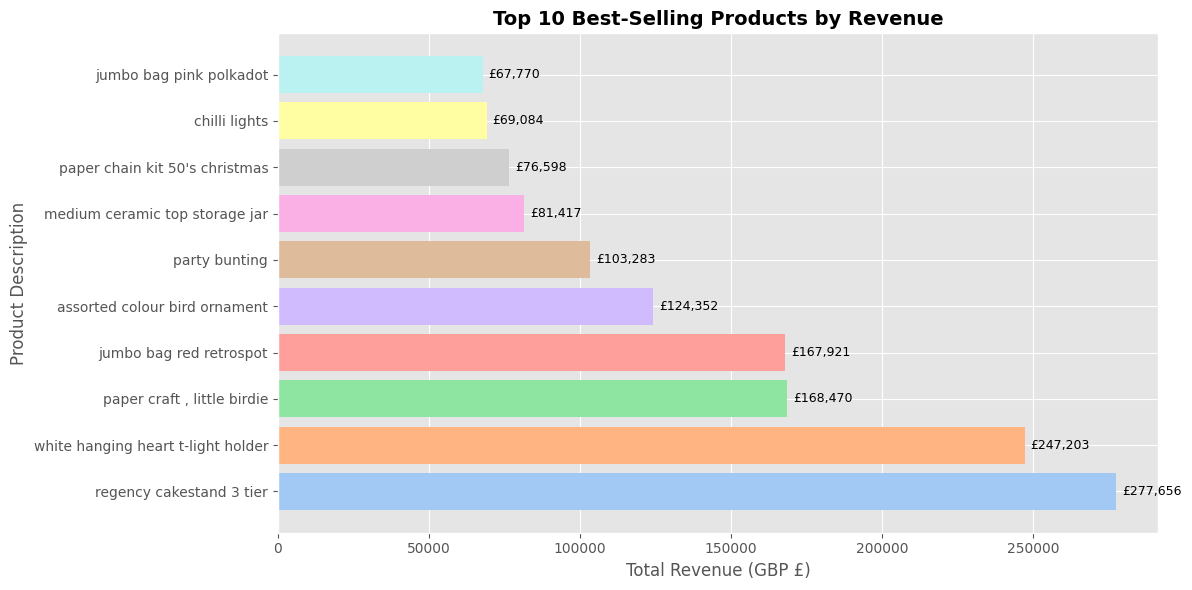

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# ✅ Export flags
OVERWRITE_PLOTS = True
OVERWRITE_CSV = True

# 📁 Define export paths
data_dir = os.path.join(project_base_path, 'eda_outputs', 'data')
plot_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

# 📄 Output filenames
csv_path = os.path.join(data_dir, '02_top_products_by_revenue.csv')
plot_path = os.path.join(plot_dir, '05_top_products_revenue.png')

# 🧮 Aggregate top 10 products by revenue
top_products_df = (
    cleaned_full_df.groupby(['stock_code', 'description'])
    .agg(
        total_revenue=('line_revenue', 'sum'),
        total_quantity=('quantity', 'sum'),
        avg_unit_price=('unit_price', 'mean')
    )
    .reset_index()
    .sort_values(by='total_revenue', ascending=False)
    .head(10)
)

# 💾 Save CSV
if OVERWRITE_CSV or not os.path.exists(csv_path):
    top_products_df.to_csv(csv_path, index=False)
    safe_print(f"✅ Exported top products summary: {csv_path}")
else:
    safe_print(f"⚠️ Skipped (already exists): {csv_path}")

# 📋 Show top products table
display(top_products_df)

# 🎨 Plot setup
plt.figure(figsize=(12, 6))
pastel_colors = sns.color_palette("pastel", len(top_products_df))

# 📊 Draw horizontal bars manually
for i, (desc, revenue) in enumerate(zip(top_products_df["description"], top_products_df["total_revenue"])):
    plt.barh(y=i, width=revenue, color=pastel_colors[i])
    plt.text(revenue + 2000, i, f"£{revenue:,.0f}", va='center', fontsize=9)

# 🏷️ Format plot
plt.yticks(ticks=range(len(top_products_df)), labels=top_products_df["description"])
plt.title("Top 10 Best-Selling Products by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue (GBP £)")
plt.ylabel("Product Description")
plt.tight_layout()

# 💾 Save plot
if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path, bbox_inches='tight')
    safe_print(f"✅ Saved plot: {plot_path}")
else:
    safe_print(f"⚠️ Skipped (already exists): {plot_path}")

# 📈 Show
plt.show()


---

### ❓ Q2: Top 10 Best-Selling Products by Revenue

The chart and table above highlight the **top 10 products by total revenue** between 2009 and 2011.

#### 🔍 Key Insights:

- 🥇 The top product, **regency cakestand 3 tier**, generated **£277,656.25** in revenue from **24,124 units** sold, with an average unit price of **£12.46**.
- 🕯️ In second place, **white hanging heart t-light holder** earned **£247,048.01** from **91,757 units** — a **low-cost, high-volume** product that sold exceptionally well.
- 🎨 Many other high-revenue products were **affordable, decorative items**, such as:
  - *paper craft, little birdie*
  - *assorted colour bird ornament*
  - *jumbo bag red retrospot*

These findings reinforce a **giftware and décor-focused product strategy**, where small, visually appealing, budget-friendly items dominate sales performance.

---


---

## 🧾 Q3: Invoices with the Highest Transaction Value

To identify the most valuable transactions, we calculate the **total revenue per invoice** by aggregating `line_revenue` across all items within each `invoice_no`.

### 🧮 Methodology
- Group by invoice (`invoice_no`)
- Aggregate:
  - Total revenue: sum of `line_revenue`
  - Number of product lines: count of rows per invoice
  - Include `customer_id` and `invoice_date` for context
- Sort in descending order by total revenue
- Display the **top 10 invoices**

> 📂 Output:
> - Data export: `eda_outputs/data/03_top_invoices_by_value.csv`
> - Plot export: `eda_outputs/plots/06_top_invoices_value.png`

This analysis highlights **high-value transactions**, often associated with **bulk buyers** or **business clients**. These invoices can be strategically valuable for loyalty initiatives, special offers, or client segmentation.

---


✅ Exported top invoice summary: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/03_top_invoices_by_value.csv


,invoice_no,total_invoice_revenue,invoice_items,customer_id,invoice_date
36574,581483,168469.60,1,16446,2011-12-09 09:15:00
20108,541431,77183.60,1,12346,2011-01-18 10:01:00
1594,493819,44051.60,94,14156,2010-01-07 12:34:00
26084,556444,38970.00,1,15098,2011-06-10 15:28:00
13241,524181,33167.80,13,17450,2010-09-27 16:59:00
30539,567423,31698.16,12,17450,2011-09-20 11:05:00
14424,526934,26007.08,15,18102,2010-10-14 09:46:00
9890,515944,22863.36,17,18102,2010-07-15 15:29:00
26270,556917,22775.93,138,12415,2011-06-15 13:37:00
32558,572209,22206.00,7,18102,2011-10-21 12:08:00


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/06_top_invoices_by_value.png


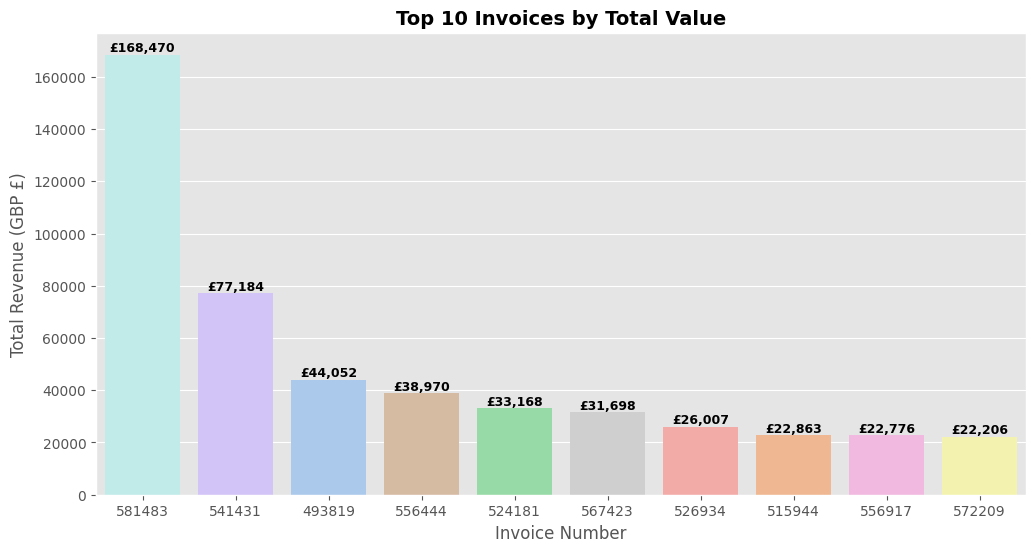

In [10]:
# 📦 Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📁 Setup
OVERWRITE_PLOTS = True
plot_index = 6
data_index = 3
plot_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
data_dir = os.path.join(project_base_path, 'eda_outputs', 'data')
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)

# 🧮 Q3: Top 10 Invoices by Total Value
invoice_summary_df = (
    cleaned_full_df.groupby('invoice_no', as_index=False)
    .agg(
        total_invoice_revenue=('line_revenue', 'sum'),
        invoice_items=('stock_code', 'count'),
        customer_id=('customer_id', 'first'),
        invoice_date=('invoice_date', 'first')
    )
    .sort_values(by='total_invoice_revenue', ascending=False)
    .head(10)
)

# 💾 Export
invoice_summary_path = os.path.join(data_dir, f"{data_index:02d}_top_invoices_by_value.csv")
invoice_summary_df.to_csv(invoice_summary_path, index=False)
print(f"✅ Exported top invoice summary: {invoice_summary_path}")

# 📋 Display summary table
from IPython.display import display
display(invoice_summary_df)

# 📊 Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=invoice_summary_df,
    x='invoice_no',
    y='total_invoice_revenue',
    hue='invoice_no',       # Required to silence deprecation warning
    order=invoice_summary_df.sort_values("total_invoice_revenue", ascending=False)["invoice_no"],
    palette='pastel',
    legend=False           # Hide legend since x already encodes this
)

plt.title('Top 10 Invoices by Total Value', fontsize=14, fontweight='bold')
plt.xlabel('Invoice Number')
plt.ylabel('Total Revenue (GBP £)')

# ➕ Add labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"£{value:,.0f}",
        (p.get_x() + p.get_width() / 2, value),
        ha='center', va='bottom', fontsize=9, fontweight='bold'
    )

# 💾 Save plot
invoice_plot_path = os.path.join(plot_dir, f"{plot_index:02d}_top_invoices_by_value.png")
if OVERWRITE_PLOTS or not os.path.exists(invoice_plot_path):
    plt.savefig(invoice_plot_path, bbox_inches='tight')
    print(f"✅ Saved plot: {invoice_plot_path}")
else:
    print(f"⚠️ Skipped (already exists): {invoice_plot_path}")

plt.show()


---

### ❓ Q3: Top 10 Invoices by Total Value

This analysis identifies the **10 highest-value invoices** in the dataset, based on total revenue from all products in each invoice.

| Metric                   | Insight                                                                                     |
|--------------------------|---------------------------------------------------------------------------------------------|
| 🧾 **Highest Invoice**    | Invoice `581483` generated **£168,469.60** from a **single item** — an extreme outlier, likely a bulk order or possible data anomaly. |
| 💰 **Invoice Range**      | Top 10 invoices range from **£22,206.00** to **£168,469.60** in total revenue. Most fall between **£22k and £77k**. |
| 📦 **Invoice Size**       | Item counts vary widely — some invoices contain over **130 items**, while others list only **1–2 items**. |
| 👤 **Repeat Customers**   | Customers `18102` and `17450` appear multiple times, suggesting **loyal, high-value clients** with repeated large purchases. |
| 🗓️ **Invoice Timing**     | These high-value invoices are distributed throughout **2010 and 2011**, without a clear seasonal pattern. |
| ⚠️ **Potential Anomalies**| The top invoice and other unusually high-value entries warrant **manual review** for data accuracy. |

This analysis highlights **large individual transactions**, which may reflect:
- High-value **B2B or wholesale orders**
- One-time **event-based purchases**
- Potential **data entry errors or unusual pricing strategies**

---


---

## 🌍 Q4: Revenue by Country (With and Without United Kingdom)

To understand the **geographic distribution of revenue** from 2009 to 2011, we analyze total sales grouped by `country`, both **including and excluding the United Kingdom**, which represents the primary market in this dataset.

### 🧮 Methodology
- Group transactions by `country`
- Aggregate:
  - `total_revenue`: sum of `line_revenue`
  - `num_invoices`: count of unique `invoice_no`
  - `avg_invoice_value`: total revenue divided by number of invoices
- Sort countries in descending order of revenue
- Generate two views:
  - 🌐 Full view including UK
  - 🌎 International-only view excluding UK

> 📂 Output:
> - Data export:
>   - `04_revenue_by_country.csv` (all countries)
>   - `04_revenue_by_country_excl_uk.csv` (excluding UK)
> - Plot export:
>   - `07_country_revenue_bar.png`
>   - `07_country_revenue_bar_excl_uk.png`

This analysis highlights the **top-performing countries overall**, and isolates **international revenue potential** by separating out the dominant UK market.

---


✅ Exported revenue by country: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/04_revenue_by_country.csv

📋 Top 10 Countries by Revenue (Including UK):


,country,total_revenue,num_invoices,avg_invoice_value
0,united kingdom,1.428973e+07,33374,428.169550
1,eire,5.866261e+05,528,1111.034242
2,netherlands,5.497734e+05,216,2545.247269
3,germany,3.831920e+05,752,509.563765
4,france,3.096856e+05,592,523.117500
5,australia,1.684528e+05,87,1936.238966
6,spain,9.639908e+04,137,703.642920
7,switzerland,9.554329e+04,90,1061.592111
8,sweden,8.604514e+04,98,878.011633
9,denmark,6.613387e+04,40,1653.346750


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/07_country_revenue_bar.png


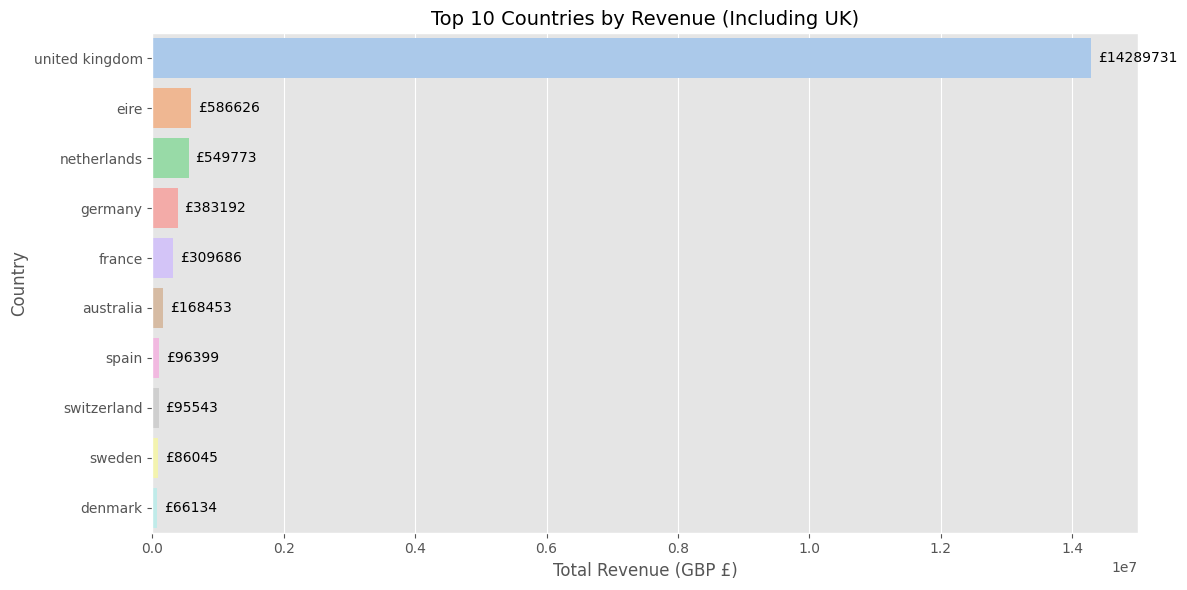

✅ Exported revenue by country (excluding UK): /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/04_revenue_by_country_excl_uk.csv

📋 Top 10 Countries by Revenue (Excluding UK):


,country,total_revenue,num_invoices,avg_invoice_value
1,eire,586626.080,528,1111.034242
2,netherlands,549773.410,216,2545.247269
3,germany,383191.951,752,509.563765
4,france,309685.560,592,523.117500
5,australia,168452.790,87,1936.238966
6,spain,96399.080,137,703.642920
7,switzerland,95543.290,90,1061.592111
8,sweden,86045.140,98,878.011633
9,denmark,66133.870,40,1653.346750
10,belgium,56787.900,144,394.360417


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/07_country_revenue_bar_excl_uk.png


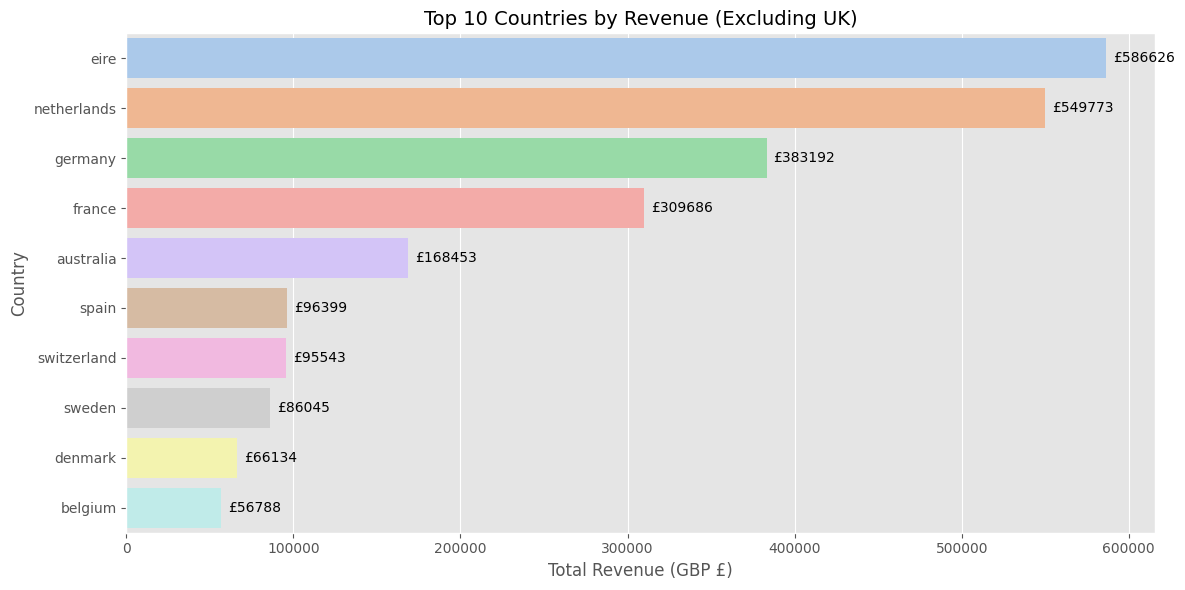

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Export directories
data_export_path = os.path.join(project_base_path, 'eda_outputs', 'data')
plot_export_path = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(data_export_path, exist_ok=True)
os.makedirs(plot_export_path, exist_ok=True)

# 📊 Full revenue summary by country
country_summary_df = (
    cleaned_full_df.groupby('country')
    .agg(
        total_revenue=('line_revenue', 'sum'),
        num_invoices=('invoice_no', 'nunique')
    )
    .assign(avg_invoice_value=lambda df: df.total_revenue / df.num_invoices)
    .sort_values('total_revenue', ascending=False)
    .reset_index()
)

# 💾 Export full country summary
full_country_path = os.path.join(data_export_path, '04_revenue_by_country.csv')
country_summary_df.to_csv(full_country_path, index=False)
safe_print(f"✅ Exported revenue by country: {full_country_path}")

# 📋 Display top 10 including UK
safe_print("\n📋 Top 10 Countries by Revenue (Including UK):")
display(country_summary_df.head(10))

# 📊 Plot including UK
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=country_summary_df.head(10),
    y='country',
    x='total_revenue',
    hue='country',  # ✅ Avoid warning
    legend=False,
    palette='pastel'
)
plt.title("Top 10 Countries by Revenue (Including UK)", fontsize=14)
plt.xlabel("Total Revenue (GBP £)")
plt.ylabel("Country")

# 💬 Add labels at end of bars
for container in ax.containers:
    ax.bar_label(container, fmt='£%.0f', label_type='edge', padding=5)

plt.tight_layout()
plot_path_all = os.path.join(plot_export_path, '07_country_revenue_bar.png')
plt.savefig(plot_path_all)
safe_print(f"✅ Saved plot: {plot_path_all}")
plt.show()

# --- 🌍 Version excluding UK ---
country_excl_uk_df = country_summary_df[country_summary_df['country'].str.lower() != 'united kingdom']

# 💾 Export international summary
intl_path = os.path.join(data_export_path, '04_revenue_by_country_excl_uk.csv')
country_excl_uk_df.to_csv(intl_path, index=False)
safe_print(f"✅ Exported revenue by country (excluding UK): {intl_path}")

# 📋 Display top 10 excluding UK
safe_print("\n📋 Top 10 Countries by Revenue (Excluding UK):")
display(country_excl_uk_df.head(10))

# 📊 Plot excluding UK
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=country_excl_uk_df.head(10),
    y='country',
    x='total_revenue',
    hue='country',  # ✅ Avoid warning
    legend=False,
    palette='pastel'
)
plt.title("Top 10 Countries by Revenue (Excluding UK)", fontsize=14)
plt.xlabel("Total Revenue (GBP £)")
plt.ylabel("Country")

# 💬 Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='£%.0f', label_type='edge', padding=5)

plt.tight_layout()
plot_path_intl = os.path.join(plot_export_path, '07_country_revenue_bar_excl_uk.png')
plt.savefig(plot_path_intl)
safe_print(f"✅ Saved plot: {plot_path_intl}")
plt.show()


---

### ❓ Q4: Revenue by Country (With and Without United Kingdom)

This analysis reveals how sales revenue is distributed geographically, helping identify **top-performing regions** and **international market opportunities**.

| Insight Category               | Key Observations                                                                 |
|--------------------------------|----------------------------------------------------------------------------------|
| 🇬🇧 **United Kingdom Dominance**       | The UK generated **£14.29M** across **33,374 invoices** — accounting for **~91%** of all revenue. |
| 🌍 **Top International Market**       | **Ireland (Eire)** leads among non-UK countries, with approximately **£586K** in revenue and a high average invoice value of ~**£1,111**. |
| 💸 **Highest Avg Invoice Value**      | The **Netherlands** tops in average invoice value at ~**£2,545**, despite a moderate volume of 216 invoices. |
| 📦 **Low Volume, High Impact**        | Countries like **Australia**, **Switzerland**, and **Denmark** generate significant revenue from **fewer than 100 invoices** each. |
| 🌐 **Diversified Markets**            | **Germany** and **France** show a healthy balance of volume and value, indicating mature and stable market performance. |
| 📈 **Regional Opportunity**           | Markets such as **Netherlands**, **Australia**, and **Denmark** are strong candidates for **B2B or premium expansion** due to high-value, low-frequency trends.

These patterns highlight the importance of maintaining UK market share while strategically expanding into high-potential international regions using **geo-targeted marketing and sales strategies**.

---


---

## 🌍 Q5: Do Customer Behaviors Differ by Country?  
### Average Spend and Purchase Frequency Analysis

This analysis helps assess **customer behavior by geography** by comparing two key metrics across countries:

- **Average spend per customer**  
- **Average number of invoices per customer**

### 🧮 Methodology
We group by `country` and compute:
- `num_customers`: number of unique customers
- `num_invoices`: number of unique invoices
- `total_revenue`: sum of `line_revenue`
- `avg_invoices_per_customer`: invoices ÷ customers
- `avg_revenue_per_customer`: revenue ÷ customers

> 📂 Output:
> - Data export: `eda_outputs/data/05_customer_behavior_by_country.csv`
> - Plot export: `eda_outputs/plots/08_country_avg_behavior_scatter.png`

This visualization helps identify:
- Countries with **high-value, frequent buyers**
- Regions with **opportunity for engagement or growth**

---


✅ Exported: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/05_customer_behavior_by_country.csv

📋 Top 10 Countries by Avg Spend & Frequency:


,country,num_customers,num_invoices,total_revenue,avg_invoices_per_customer,avg_revenue_per_customer
0,united kingdom,5334,33374,1.428973e+07,6.256843,2678.989607
1,eire,3,528,5.866261e+05,176.000000,195542.026667
2,netherlands,22,216,5.497734e+05,9.818182,24989.700455
3,germany,106,752,3.831920e+05,7.094340,3615.018406
4,france,93,592,3.096856e+05,6.365591,3329.952258
5,australia,14,87,1.684528e+05,6.214286,12032.342143
6,spain,35,137,9.639908e+04,3.914286,2754.259429
7,switzerland,22,90,9.554329e+04,4.090909,4342.876818
8,sweden,19,98,8.604514e+04,5.157895,4528.691579
9,denmark,9,40,6.613387e+04,4.444444,7348.207778


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/08_country_avg_behavior_scatter.png


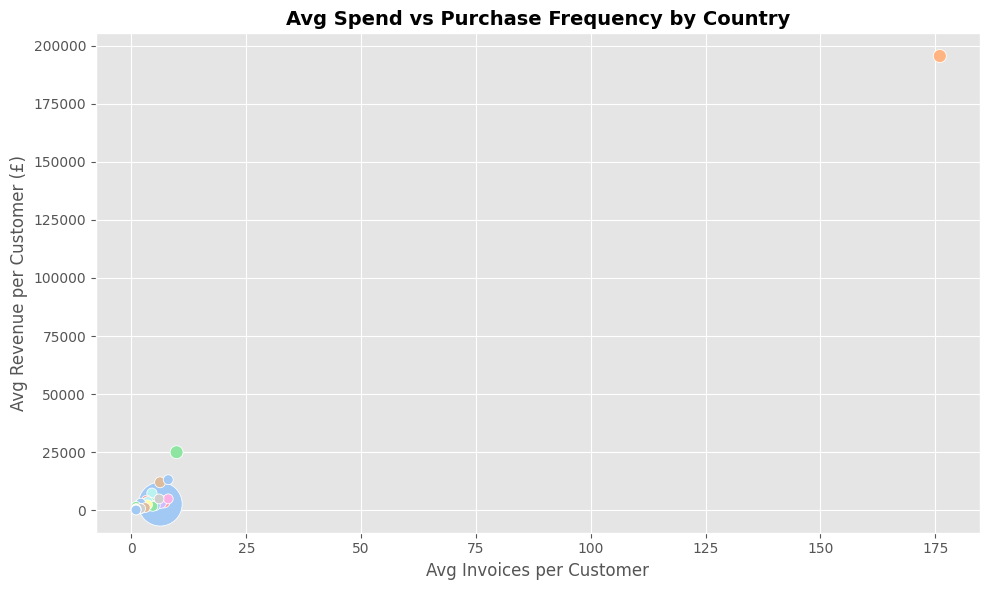

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📁 Export paths
data_dir = os.path.join(project_base_path, 'eda_outputs', 'data')
plot_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

# 🔧 File paths
data_path = os.path.join(data_dir, '05_customer_behavior_by_country.csv')
plot_path = os.path.join(plot_dir, '08_country_avg_behavior_scatter.png')

# 📊 Aggregate by country
country_behavior = (
    cleaned_full_df.groupby('country')
    .agg(
        num_customers=('customer_id', 'nunique'),
        num_invoices=('invoice_no', 'nunique'),
        total_revenue=('line_revenue', 'sum')
    )
    .assign(
        avg_invoices_per_customer=lambda df: df['num_invoices'] / df['num_customers'],
        avg_revenue_per_customer=lambda df: df['total_revenue'] / df['num_customers']
    )
    .sort_values(by='total_revenue', ascending=False)
    .reset_index()
)

# 💾 Save to CSV
country_behavior.to_csv(data_path, index=False)
safe_print(f"✅ Exported: {data_path}")

# 📋 Display top 10
safe_print("\n📋 Top 10 Countries by Avg Spend & Frequency:")
display(country_behavior.head(10))

# 📈 Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_behavior,
    x='avg_invoices_per_customer',
    y='avg_revenue_per_customer',
    size='total_revenue',
    hue='country',
    palette='pastel',
    legend=False,
    sizes=(50, 1000)
)

plt.title('Avg Spend vs Purchase Frequency by Country', fontsize=14, weight='bold')
plt.xlabel('Avg Invoices per Customer')
plt.ylabel('Avg Revenue per Customer (£)')
plt.grid(True)
plt.tight_layout()
plt.savefig(plot_path)
safe_print(f"✅ Saved plot: {plot_path}")
plt.show()


### ❓ Q5: Avg Spend and Purchase Frequency by Country

This scatter plot reveals how **average customer behavior** varies by country — considering both **purchase frequency** and **total spend**.

| Insight Category               | Key Observations                                                                 |
|--------------------------------|----------------------------------------------------------------------------------|
| 🇬🇧 **UK Benchmark**                   | The UK has **5,334 customers** with an average of **6.26 invoices** and **£2,679 revenue per customer** — our largest and most balanced group. |
| ☘️ **Ireland (Eire)**                | With only **3 customers**, Ireland shows **exceptionally high values** (~**£195K revenue** and **176 invoices per customer**) — likely due to **atypical client behavior** such as a bulk purchasing client, internal use account, or testing/demo user. |
| 🇳🇱 **Netherlands**                  | Strong potential market with **£24.9K per customer** and **~10 invoices/customer** — indicating high engagement and value. |
| 🇫🇷 🇩🇪 **France & Germany**           | Both show a **balanced customer base** and solid per-customer revenue (**~£3.3K–£3.6K**) — suggesting mature buyer relationships. Germany may also support **mid-tier premium strategies**. |
| 🌍 **Premium Segmentation Candidates** | Countries like **Sweden**, **Switzerland**, **Denmark**, and **Australia** show **low-frequency but high-value** purchasing behavior — ideal for **premium offerings or B2B targeting**. |

> ⚠️ **Note**: Ireland’s high metrics result from **only 3 customers**. These may include a **bulk buyer**, a **test/demo account**, or other **non-typical users**, so interpret with caution.

These patterns help guide decisions on:
- Which countries warrant **deeper engagement**
- Where to test **premium offerings**
- Where **volume vs. value strategies** might work best


---

## 👤 Q6: How Many Customers Made Only One Purchase?

This analysis breaks down customers based on **how many unique invoices** they generated, classifying them as either:

- **Single Purchase** – exactly one invoice  
- **Repeat Customer** – more than one invoice

### 🧮 Methodology
We group transactions by `customer_id` and:
- Count the number of unique `invoice_no` per customer
- Classify each as `"Single Purchase"` or `"Repeat Customer"`

> 📂 Output:
> - Data export: `eda_outputs/data/06_one_time_vs_repeat_customers.csv`  
> - Plot export: `eda_outputs/plots/09_one_time_vs_repeat_customers.png`

### 🔍 Why It Matters:
This breakdown provides a high-level view of **customer retention** and **repeat purchase behavior**. A high proportion of single-purchase customers may indicate:
- Missed opportunities for re-engagement
- Seasonal or one-off buyers
- Gaps in retention strategy or follow-up

Understanding this split helps prioritize **customer loyalty programs** and refine **post-purchase engagement** efforts.

---


✅ Exported: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/06_one_time_vs_repeat_customers.csv


,customer_type,count,percent
0,Repeat Customer,4234,72.351333
1,Single Purchase,1618,27.648667


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/09_one_time_vs_repeat_customers.png


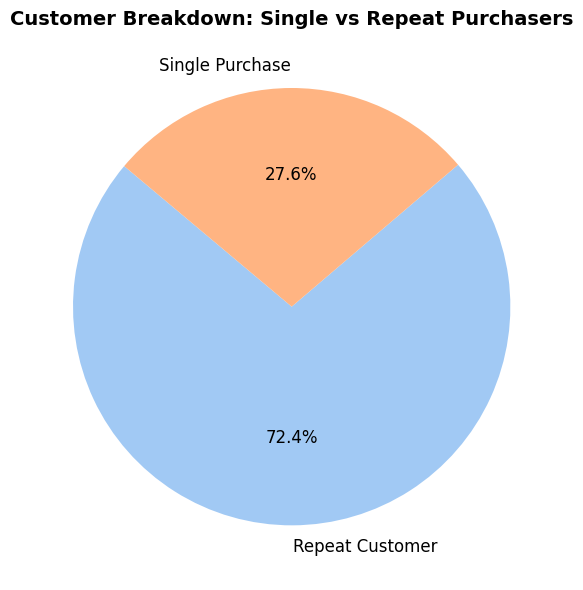

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📁 Define paths
data_dir = os.path.join(project_base_path, 'eda_outputs', 'data')
plot_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

# 🔧 File outputs
output_csv = os.path.join(data_dir, '06_one_time_vs_repeat_customers.csv')
output_plot = os.path.join(plot_dir, '09_one_time_vs_repeat_customers.png')

# 📊 Count unique invoices per customer
invoice_counts = (
    cleaned_full_df.groupby('customer_id')
    .agg(
        total_invoices=('invoice_no', 'nunique'),
        total_revenue=('line_revenue', 'sum')
    )
    .reset_index()
)

# 🧩 Label customers
invoice_counts['customer_type'] = invoice_counts['total_invoices'].apply(
    lambda x: 'Single Purchase' if x == 1 else 'Repeat Customer'
)

# 📋 Summary counts
summary = invoice_counts['customer_type'].value_counts().reset_index()
summary.columns = ['customer_type', 'count']
summary['percent'] = (summary['count'] / summary['count'].sum()) * 100

# 💾 Export results
invoice_counts.to_csv(output_csv, index=False)
safe_print(f"✅ Exported: {output_csv}")

# 📊 Display summary
display(summary)

# 📈 Pie chart
plt.figure(figsize=(6, 6))
colors = sns.color_palette('pastel')[0:2]
plt.pie(
    summary['count'],
    labels=summary['customer_type'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title('Customer Breakdown: Single vs Repeat Purchasers', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig(output_plot)
safe_print(f"✅ Saved plot: {output_plot}")
plt.show()


---

### ❓ Q6: How Many Customers Made Only One Purchase?

This analysis reveals the proportion of customers who placed **only one order** compared to those who made **repeat purchases**.

We classified each customer based on the number of unique invoices associated with their ID, and grouped the results as:

- **Single Purchase** (only one invoice)
- **Repeat Customer** (two or more invoices)

| Customer Type      | Count | Percent |
|--------------------|-------|---------|
| 🌀 Repeat Customer  | 4,234 | 72.35%  |
| 🔹 Single Purchase  | 1,618 | 27.65%  |

---

### 🔍 Key Insights:

- 🌀 Nearly **3 out of 4 customers** made **multiple purchases**, suggesting **decent customer retention**.
- 🔹 Around **28% of users** only purchased **once**, which presents an opportunity for **re-engagement campaigns**.
- This segmentation is useful for building **loyalty strategies**, identifying **at-risk users**, and guiding **RFM segmentation** in future analysis.


---

---

## 💳 Q7: What is the Average Order Value per Customer?

This question explores **how much each customer spends per order on average**, offering insight into **purchase behavior** and **order economics**.

### 🧮 Methodology

- Group by `customer_id`
- Calculate:
  - `total_spent`: sum of `line_revenue`
  - `num_orders`: number of unique `invoice_no`
  - `avg_order_value`: total_spent ÷ num_orders

> 📂 Output:
> - Data export: `eda_outputs/data/07_avg_order_value_per_customer.csv`
> - Plot export: `eda_outputs/plots/10_avg_order_value_distribution.png`

This metric is useful for:

- Setting **promotional thresholds** (e.g. free shipping over X)
- Identifying **high-value customer segments**
- Comparing order behavior between **B2B and B2C clients**

---


✅ Exported: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/07_avg_order_value_per_customer.csv

📋 Top 10 Customers by Avg Order Value:


,customer_id,total_spent,num_orders,avg_order_value
0,16446,168472.50,2,84236.250000
1,15749,44534.30,3,14844.766667
2,15098,39916.50,3,13305.500000
3,13687,11880.84,1,11880.840000
4,18052,10877.18,1,10877.180000
5,12590,9341.26,1,9341.260000
6,12357,17437.66,2,8718.830000
7,13902,34023.26,5,6804.652000
8,12346,77556.46,12,6463.038333
9,12415,144033.37,24,6001.390417



📋 Frequency Table for Avg Order Value:


,count
avg_order_value,
"(-81.283, 5618.503]",5842
"(5618.503, 11234.057]",6
"(11234.057, 16849.61]",3
"(16849.61, 22465.163]",0
"(22465.163, 28080.717]",0
"(28080.717, 33696.27]",0
"(33696.27, 39311.823]",0
"(39311.823, 44927.377]",0
"(44927.377, 50542.93]",0



✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/10_avg_order_value_distribution.png


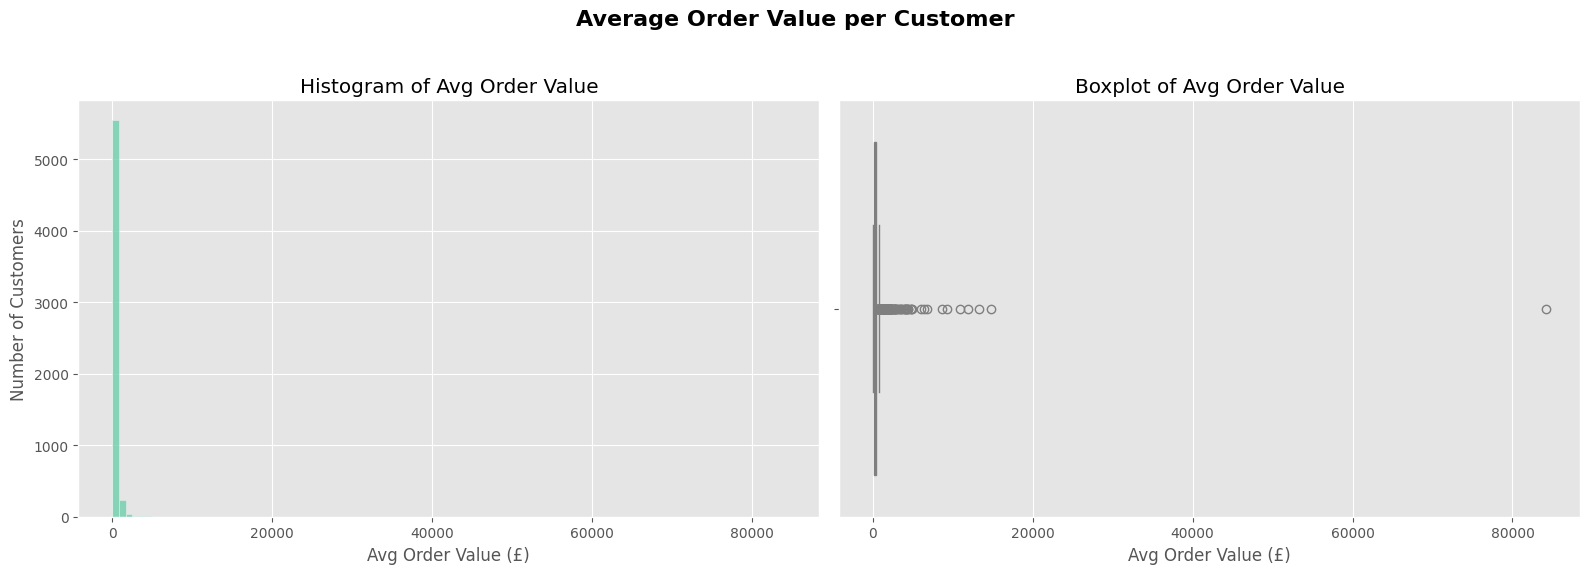

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Output folders
data_dir = os.path.join(project_base_path, 'eda_outputs', 'data')
plot_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

# 🔧 Define file paths
export_path = os.path.join(data_dir, '07_avg_order_value_per_customer.csv')
plot_path = os.path.join(plot_dir, '10_avg_order_value_distribution.png')  # adjusted index

# 📊 Compute average order value per customer
avg_order_df = (
    cleaned_full_df.groupby(['customer_id', 'invoice_no'])['line_revenue']
    .sum()
    .reset_index()
    .groupby('customer_id')
    .agg(
        total_spent=('line_revenue', 'sum'),
        num_orders=('invoice_no', 'nunique')
    )
    .assign(avg_order_value=lambda df: df['total_spent'] / df['num_orders'])
    .sort_values(by='avg_order_value', ascending=False)
    .reset_index()
)

# 💾 Save summary table
avg_order_df.to_csv(export_path, index=False)
safe_print(f"✅ Exported: {export_path}")

# 📋 Show top 10
safe_print("\n📋 Top 10 Customers by Avg Order Value:")
display(avg_order_df.head(10))

# 📊 Frequency table (raw only)
bins = 15
freq_raw = pd.cut(avg_order_df['avg_order_value'], bins=bins).value_counts().sort_index()
safe_print("\n📋 Frequency Table for Avg Order Value:")
display(freq_raw)

# 🎨 Plot: Histogram and Boxplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Average Order Value per Customer", fontsize=16, weight="bold")

# Histogram
sns.histplot(avg_order_df['avg_order_value'], bins=100, ax=axes[0], color='mediumaquamarine')
axes[0].set_title("Histogram of Avg Order Value")
axes[0].set_xlabel("Avg Order Value (£)")
axes[0].set_ylabel("Number of Customers")

# Boxplot
sns.boxplot(x=avg_order_df['avg_order_value'], ax=axes[1], color='lightgray')
axes[1].set_title("Boxplot of Avg Order Value")
axes[1].set_xlabel("Avg Order Value (£)")

# Save and show
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(plot_path)
safe_print(f"\n✅ Saved plot: {plot_path}")
plt.show()


---

### ❓ Q7: What is the Average Order Value per Customer?

We analyzed the **average order value (AOV)** for each customer by dividing their total spending by the number of unique invoices associated with their ID.

---

#### 🧾 Top 10 Customers by AOV

The top 10 customers show **exceptionally high average order values** — with one customer averaging **£84,236.25** per order. These are likely **wholesale buyers**, **event-based purchases**, or other **unusual cases** that stand out from the rest of the customer base.

| Customer Type     | AOV Example                            |
|-------------------|----------------------------------------|
| 🧑‍💼 Bulk Buyer     | Customer `16446` → **£84K** per order     |
| 🛍️ High Spender    | Customer `15749` → **£14.8K** per order   |
| 📉 Typical User    | Most customers → **< £5,600** per order  |

---

#### 📋 Frequency Table

The frequency table shows that:

- **99.8%** of customers place orders with an average value **under £5,600**
- Only **10 customers** exceed that threshold
- One customer falls into the final bin (~**£84K**), confirming an **extreme outlier**

This strong **right-skew** highlights the need to account for outliers when analyzing customer value.

---

#### 📈 Visual Distribution

The **histogram** and **boxplot** clearly illustrate this skew:

- The **histogram** shows nearly all customers concentrated in the lower range of AOV
- The **boxplot** confirms a **tight interquartile range** with several **high-value outliers**

> These visualizations support robust customer segmentation — helping identify **typical users** vs **high-value outliers**, and guiding **loyalty programs**, **discount thresholds**, or **RFM segmentation** strategies.

---


---

### 💰 Q8: Who Are the Top 10 Customers by Total Spend?

To identify the most valuable customers, we calculate the **total revenue** generated by each customer across all transactions.

---

#### 🧮 Methodology

- Group transactions by `customer_id`
- Aggregate:
  - `total_spent`: sum of `line_revenue`
  - `num_orders`: count of unique `invoice_no`
  - `avg_order_value`: total_spent ÷ num_orders
- Sort customers by total_spent in descending order
- Select the top 10 for detailed review

> 📂 Outputs:
> - Data export: `08_top_customers_by_total_spend.csv`
> - Plot export: `11_top_customers_by_total_spend.png`

---

#### 📊 Key Business Value

- Identifies **high-value clients** for **retention**, **loyalty programs**, and **account-based marketing**
- Helps assess how much revenue depends on a few top buyers
- Supports **priority segmentation** and **custom communication strategies**

---

#### 📋 Metrics Reported per Customer

| Metric             | Description                                       |
|--------------------|---------------------------------------------------|
| `customer_id`      | Unique identifier                                 |
| `total_spent`      | Total revenue across all purchases                |
| `num_orders`       | Number of unique invoices                         |
| `avg_order_value`  | Average revenue per order (total_spent ÷ orders)  |

The top 10 customers offer valuable insight into **spending patterns**, **engagement level**, and **strategic account value**. They should be prioritized for retention and further analysis.

---


✅ Exported: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/08_top_customers_by_total_spend.csv

📋 Top 10 Customers by Total Spend:


,customer_id,total_spent,num_orders,avg_order_value
0,18102,580987.04,145,4006.807172
1,14646,526751.52,145,3632.769103
2,14156,303069.88,144,2104.651944
3,14911,272252.79,373,729.900241
4,17450,244784.25,51,4799.691176
5,13694,195640.69,143,1368.116713
6,17511,172132.87,60,2868.881167
7,16446,168472.50,2,84236.250000
8,16684,147142.77,55,2675.323091
9,12415,144033.37,24,6001.390417


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/11_top_customers_by_total_spend.png


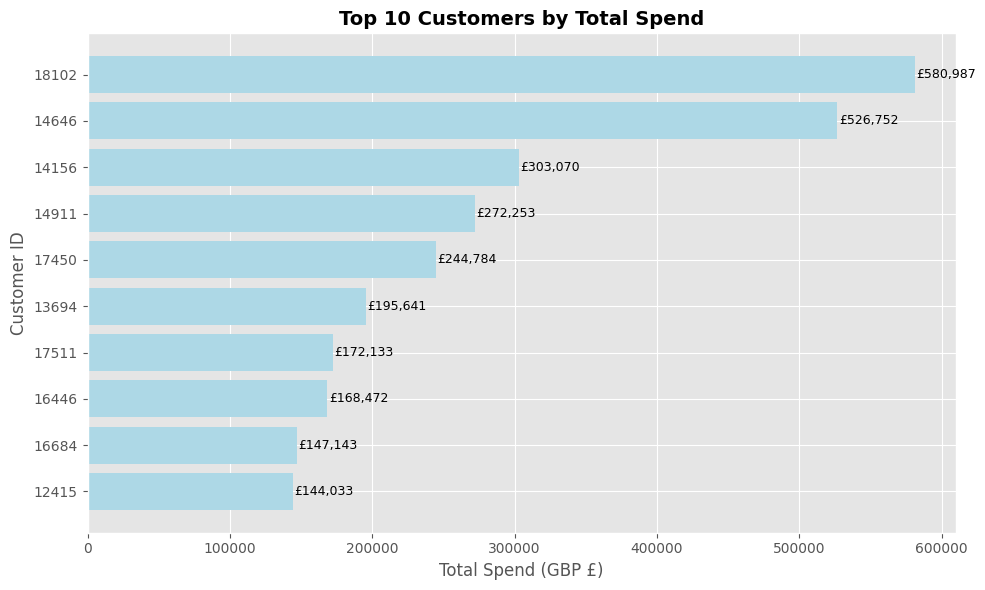

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 📁 Define output paths
data_dir = os.path.join(project_base_path, 'eda_outputs', 'data')
plot_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

data_output_path = os.path.join(data_dir, '08_top_customers_by_total_spend.csv')
plot_output_path = os.path.join(plot_dir, '11_top_customers_by_total_spend.png')

# 🧮 Top spenders calculation
top_spenders_df = (
    cleaned_full_df.groupby('customer_id')
    .agg(
        total_spent=('line_revenue', 'sum'),
        num_orders=('invoice_no', 'nunique')
    )
    .assign(avg_order_value=lambda df: df['total_spent'] / df['num_orders'])
    .sort_values(by='total_spent', ascending=False)
    .reset_index()
    .head(10)
)

# 💾 Save data
top_spenders_df.to_csv(data_output_path, index=False)
safe_print(f"✅ Exported: {data_output_path}")

# 📋 Display
safe_print("\n📋 Top 10 Customers by Total Spend:")
display(top_spenders_df)

# 🎨 Plot using Matplotlib directly (avoid seaborn’s layout bloat)
fig, ax = plt.subplots(figsize=(10, 6))
sorted_df = top_spenders_df.sort_values(by='total_spent')  # Plot from lowest to highest for horizontal bars

ax.barh(sorted_df['customer_id'].astype(str), sorted_df['total_spent'], color='lightblue')
ax.set_xlabel('Total Spend (GBP £)')
ax.set_ylabel('Customer ID')
ax.set_title('Top 10 Customers by Total Spend', fontsize=14, weight='bold')

# 💬 Annotate bars
for i, value in enumerate(sorted_df['total_spent']):
    ax.text(value + 1000, i, f"£{value:,.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.savefig(plot_output_path)
safe_print(f"✅ Saved plot: {plot_output_path}")
plt.show()



---

### ❓ Q8: Who Are the Top 10 Customers by Total Spend?

We identified the **most valuable customers** by calculating the **total revenue** each has generated across all invoices.

---

#### 🧾 Top 10 Customers by Lifetime Value

The table below lists the top-spending customers between 2009 and 2011. These clients account for a **significant portion of total revenue**.

| Metric             | Description |
|--------------------|-------------|
| `total_spent`      | Total revenue across all purchases |
| `num_orders`       | Unique invoice count per customer |
| `avg_order_value`  | Average spend per order (total_spent ÷ orders) |

Key observations:

- 🥇 **Customer 18102** tops the list with **£580,987** across 145 orders.
- 💼 Several others (e.g., `14646`, `14156`) show high revenue from **consistent repeat ordering**.
- 📦 **Customer `16446`** stands out with just **2 orders** but **£168K total spend** — likely a **bulk B2B transaction or anomaly**.
- 🧠 These customers warrant **special attention** for retention, loyalty programs, or custom offers.

---

#### 📈 Visual Distribution

The horizontal bar chart below shows the top 10 spenders in descending order:

- Highlights **relative revenue contributions**
- Annotated with actual GBP totals for clarity
- Sorted for visual impact and comparison

> These insights are essential for **customer segmentation**, prioritizing **high-value accounts**, and designing **tiered marketing strategies** based on revenue contribution.

---


---

### 🕒 Q9: How Recently Has Each Customer Made a Purchase?

This step measures the **Recency** of each customer by calculating the number of days since their **last purchase**, relative to the most recent transaction in the dataset.

---

#### 🧮 Methodology:

- Group transactions by `customer_id`
- Find the **most recent `invoice_date`** for each customer
- Define the **reference date** as the **latest invoice date** in the dataset
- Compute **Recency** as the number of days between the reference date and each customer's last purchase

> 📂 Outputs:
> - Data export: `09_customer_recency.csv`
> - Plot export: `12_customer_recency_distribution.png`

---

#### 📊 Business Value:

- Helps identify **active vs. inactive users**
- Supports **re-engagement campaigns** targeting dormant customers
- Lays the foundation for **RFM segmentation**

---

#### 📈 What We Expect to See:

- Many customers will have made purchases close to the reference date  
- Some will have long gaps since their last purchase (potential churn risk)  
- We’ll visualize this distribution using a histogram and boxplot

---

✅ Exported: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/09_customer_recency.csv

📋 Sample Customers by Recency (Top & Bottom):


,customer_id,invoice_date,recency_days
2346,14730,2011-12-08 14:39:00,0
3949,16358,2011-12-08 15:09:00,0
75,12423,2011-12-09 10:10:00,0
1140,13510,2011-12-08 13:46:00,0
1036,13404,2011-12-08 15:37:00,0


,customer_id,invoice_date,recency_days
2270,14654,2009-12-01 12:57:00,737
4636,17056,2009-12-01 12:55:00,737
4667,17087,2009-12-02 10:41:00,737
3432,15833,2009-12-02 11:59:00,737
5164,17592,2009-12-01 10:49:00,738


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/12_customer_recency_distribution.png


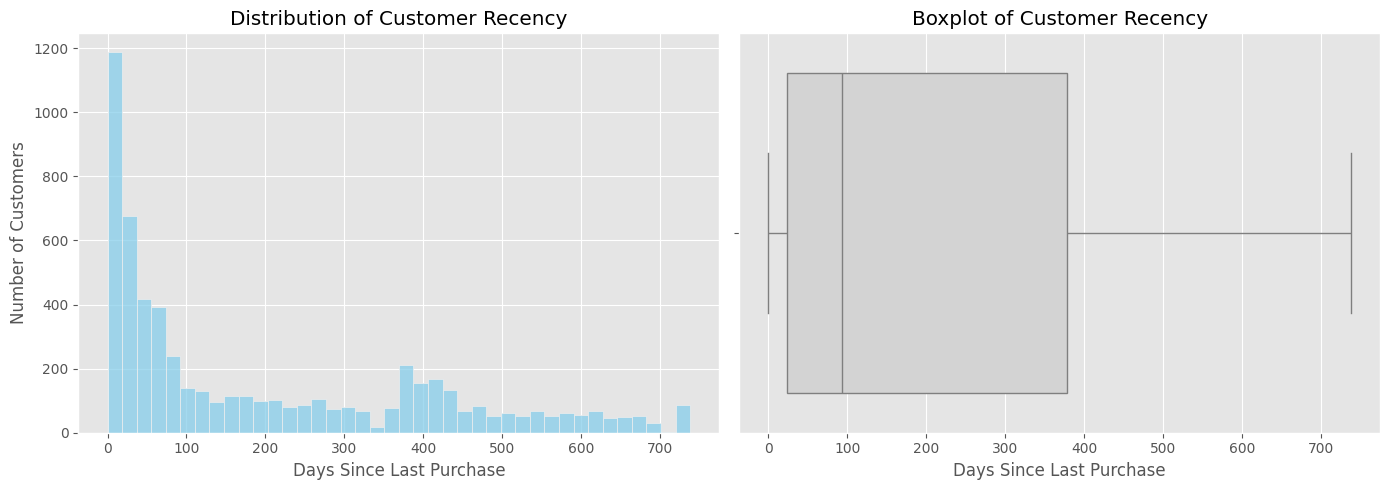

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Define export directories
data_dir = os.path.join(project_base_path, 'eda_outputs', 'data')
plot_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

# 🔧 Define file paths
recency_csv = os.path.join(data_dir, '09_customer_recency.csv')
recency_plot = os.path.join(plot_dir, '12_customer_recency_distribution.png')

# 🕒 Reference date = latest invoice date in dataset
reference_date = cleaned_full_df['invoice_date'].max()

# 🧮 Calculate recency per customer
recency_df = (
    cleaned_full_df.groupby('customer_id')['invoice_date']
    .max()
    .reset_index()
    .assign(recency_days=lambda df: (reference_date - df['invoice_date']).dt.days)
    .sort_values(by='recency_days')
)

# 💾 Save to CSV
recency_df.to_csv(recency_csv, index=False)
safe_print(f"✅ Exported: {recency_csv}")

# 📋 Show first and last 5 rows for context
safe_print("\n📋 Sample Customers by Recency (Top & Bottom):")
display(recency_df.head(5))
display(recency_df.tail(5))

# 🎨 Plot distribution
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(recency_df['recency_days'], bins=40, kde=False, color='skyblue')
plt.title("Distribution of Customer Recency")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=recency_df['recency_days'], color='lightgray')
plt.title("Boxplot of Customer Recency")
plt.xlabel("Days Since Last Purchase")

plt.tight_layout()
plt.savefig(recency_plot)
safe_print(f"✅ Saved plot: {recency_plot}")
plt.show()


---

### ❓ Q9: How Recently Has Each Customer Made a Purchase?

We calculated each customer's **Recency** — the number of days since their most recent purchase — relative to the dataset’s latest invoice date (**2011-12-09**).

---

#### 🧮 Key Observations

- 🟢 Multiple customers made purchases on the **final day of available data** (`recency_days = 0`)
- 📉 Most customers made their most recent purchase within the **first 100 days**
- 🟡 Recency spans from **0 to 738 days**, with a long right tail
- 📦 A small number of customers haven’t purchased in **over 2 years**, signaling potential **churn** or **inactive accounts**

---

#### 📋 Sample Customers by Recency (Top & Bottom)

The table below shows examples of both **active** and **inactive** customers:

- Customers with `recency_days = 0` → recently engaged
- Customers with `recency_days > 700` → dormant or churned

These recency values will help define **RFM segmentation** thresholds and identify targets for **retention campaigns**.

---

#### 📊 Visual Insights

- The **histogram** confirms a strong cluster of customers with low recency (recent buyers)
- The **boxplot** highlights a **highly skewed distribution**, with many long-inactive customers far from the median

This analysis lays the foundation for more effective segmentation and **customer lifecycle marketing**.

---


---

### 🔁 Q10: How Frequently Has Each Customer Purchased?

This step calculates the **Frequency** of each customer by counting the number of **unique invoices** they generated throughout the dataset.

---

#### 🧮 Methodology:

- Group the data by `customer_id`
- Count the number of **unique `invoice_no`** per customer
- Define Frequency as the total number of **distinct purchase events**

> 📂 Outputs:
> - Data export: `10_customer_frequency.csv`
> - Plot export: `13_customer_frequency_distribution.png`

---

#### 📊 Business Value:

- Identifies **repeat vs. one-time customers**
- Enables segmentation of **high-engagement** users
- Supports **customer loyalty** analysis and **lifecycle marketing**

---

#### 📈 What We Expect to See:

- Many customers may have purchased only once
- A smaller segment may be **frequent or loyal shoppers**
- The histogram and boxplot will reveal the shape and skewness of purchase frequency

---


✅ Exported: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/10_customer_frequency.csv

📋 Sample Customers by Frequency (Top & Bottom):


,customer_id,num_orders,total_spent,avg_order_value
0,14911,373,272252.79,729.900241
1,12748,322,49176.74,152.722795
2,17841,211,68519.95,324.739100
3,15311,207,114671.42,553.968213
4,13089,203,113416.91,558.703990


,customer_id,num_orders,total_spent,avg_order_value
5847,18274,1,175.92,175.92
5848,18269,1,168.60,168.60
5849,12368,1,917.70,917.70
5850,12367,1,150.90,150.90
5851,12366,1,500.24,500.24



📋 Frequency Table for Number of Orders:


,0
"(1.0, 8.440000000000001]",4735
"(8.440000000000001, 15.88]",653
"(15.88, 23.32]",231
"(23.32, 30.76]",94
"(30.76, 38.2]",56
"(38.2, 45.64]",22
"(45.64, 53.080000000000005]",13
"(53.080000000000005, 60.52]",14
"(60.52, 67.96000000000001]",4
"(67.96000000000001, 75.4]",6


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/13_customer_frequency_distribution.png


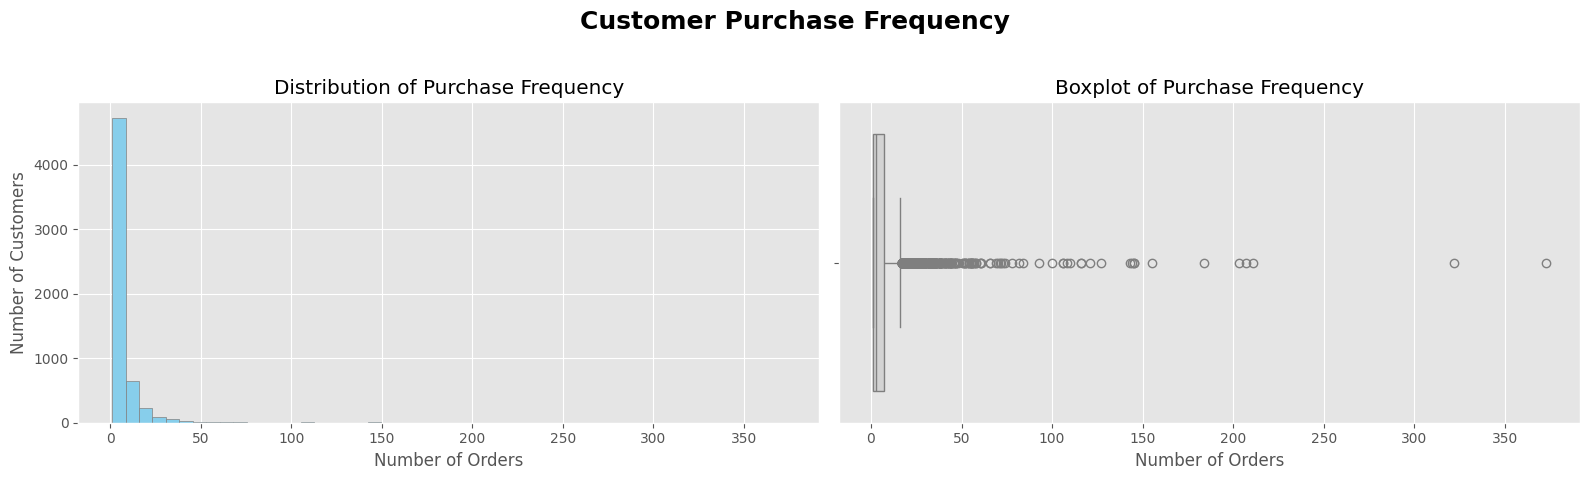

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define export paths
export_path = os.path.join(data_dir, '10_customer_frequency.csv')
plot_path = os.path.join(plot_dir, '13_customer_frequency_distribution.png')

# 📊 Calculate customer frequency
frequency_df = (
    cleaned_full_df.groupby('customer_id')
    .agg(
        num_orders=('invoice_no', 'nunique'),
        total_spent=('line_revenue', 'sum')
    )
    .assign(avg_order_value=lambda df: df['total_spent'] / df['num_orders'])
    .sort_values(by='num_orders', ascending=False)
    .reset_index()
)

# 💾 Export CSV
frequency_df.to_csv(export_path, index=False)
safe_print(f"✅ Exported: {export_path}")

# 📋 Show sample customers (top & bottom)
safe_print("\n📋 Sample Customers by Frequency (Top & Bottom):")
display(frequency_df.head())
display(frequency_df.tail())

# 📊 Create bin edges (50 bins) and compute histogram
bin_count = 50
counts, bin_edges = np.histogram(frequency_df['num_orders'], bins=bin_count)

# 📋 Display frequency table using histogram counts
freq_table = pd.Series(counts, index=pd.IntervalIndex.from_breaks(bin_edges))
safe_print("\n📋 Frequency Table for Number of Orders:")
display(freq_table)

# 🎨 Plot histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("Customer Purchase Frequency", fontsize=18, weight="bold")

# Histogram (manual bar plot)
axes[0].bar(x=bin_edges[:-1], height=counts, width=np.diff(bin_edges), color='skyblue', align='edge', edgecolor='gray')
axes[0].set_title("Distribution of Purchase Frequency")
axes[0].set_xlabel("Number of Orders")
axes[0].set_ylabel("Number of Customers")

# Boxplot
sns.boxplot(x=frequency_df['num_orders'], ax=axes[1], color='lightgray')
axes[1].set_title("Boxplot of Purchase Frequency")
axes[1].set_xlabel("Number of Orders")

# Save and show
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(plot_path)
safe_print(f"✅ Saved plot: {plot_path}")
plt.show()


---

### ❓ Q10: How Frequently Has Each Customer Purchased?

We measured **Frequency** as the total number of **unique orders (`invoice_no`)** made by each customer during the observed period.

---

#### 🧮 Key Observations:

- 🟦 **Most customers** placed **between 1 and 8 orders**, with **4,735 users** falling into this initial bin.
- 🟡 A few customers placed more than **100** orders — with the most active buyer reaching **373 invoices**.
- 📉 The **distribution is right-skewed**, suggesting the presence of a small group of **power users** amid a broader base of casual shoppers.

---

#### 📊 Visual Insights:

- The **histogram** shows a steep drop after the first bin, confirming that **low-frequency shoppers dominate** the user base.
- The **boxplot** visually highlights **numerous outliers**, helping spot highly engaged or anomalous customers.

> These findings are valuable for **customer segmentation**, **loyalty analysis**, and defining tailored **marketing strategies** for frequent buyers.

---


---

### 💰 Q11: What is the Monetary Value of Each Customer?

We calculated **Monetary Value** as the total amount each customer spent across all orders in the dataset.

---

#### 🧮 Methodology:

- Group transactions by `customer_id`
- Sum the `line_revenue` per customer to compute total spend
- Sort to identify **top-spending users**

> 📂 Outputs:
> - Data export: `11_customer_monetary_value.csv`
> - Plot export: `14_customer_monetary_value_distribution.png`

---

#### 📊 Business Value:

- Helps identify **high-value customers** for VIP programs or exclusive offers
- Enables **RFM segmentation** by combining Recency, Frequency, and Monetary metrics
- Useful for calculating **Customer Lifetime Value (CLV)** when paired with time windows

---

#### 📈 What We Expect to See:

- A right-skewed distribution, where most customers spend a relatively low amount
- A few standout customers contributing a significant portion of total revenue

---


✅ Exported: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/11_customer_monetary_value.csv

📋 Sample Customers by Monetary Value (Top & Bottom):


,customer_id,total_spent,num_orders,avg_order_value
0,18102,580987.04,145,4006.807172
1,14646,526751.52,145,3632.769103
2,14156,303069.88,144,2104.651944
3,14911,272252.79,373,729.900241
4,17450,244784.25,51,4799.691176


,customer_id,total_spent,num_orders,avg_order_value
5847,15913,6.30,1,6.30
5848,14792,6.20,1,6.20
5849,16738,3.75,1,3.75
5850,13788,3.75,1,3.75
5851,14095,2.95,1,2.95



📋 Frequency Table for Total Spend:


,count
total_spent,
"(2.95, 19369.086]",5751
"(19369.086, 38735.223]",58
"(38735.223, 58101.359]",17
"(58101.359, 77467.495]",6
"(77467.495, 96833.632]",4
"(96833.632, 116199.768]",4
"(116199.768, 135565.904]",1
"(135565.904, 154932.041]",2
"(154932.041, 174298.177]",2


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/14_customer_monetary_value_distribution.png


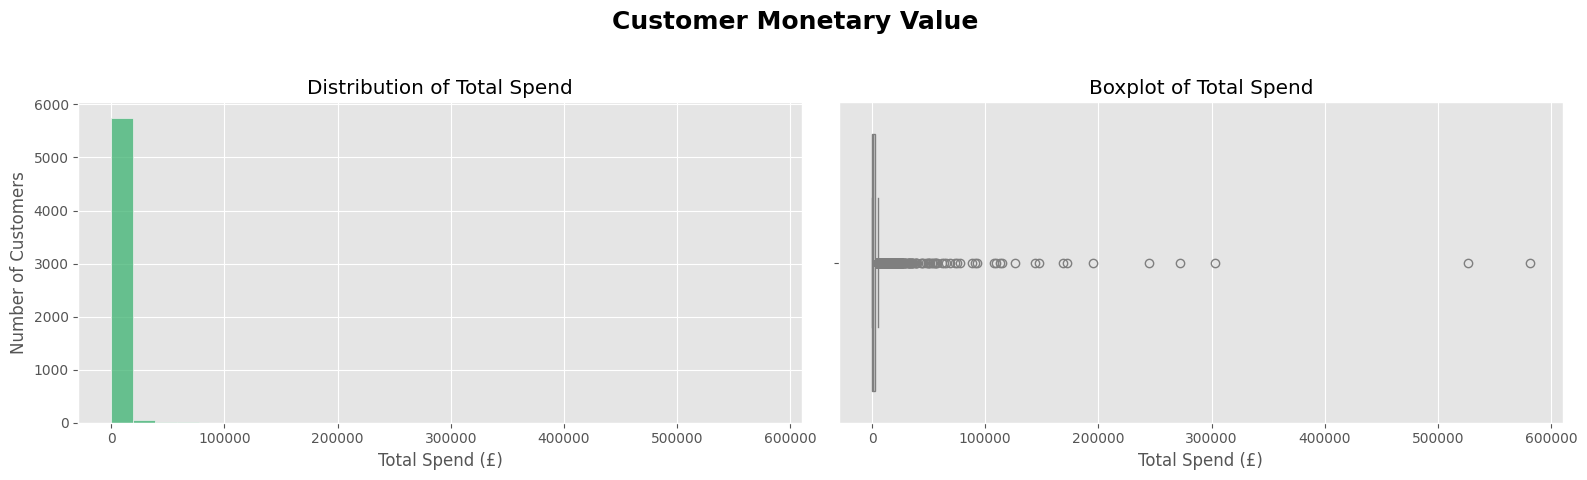

In [18]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ✅ Setup paths
data_dir = os.path.join(project_base_path, 'eda_outputs', 'data')
plot_dir = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

# 🔧 File paths
export_path = os.path.join(data_dir, '11_customer_monetary_value.csv')
plot_path = os.path.join(plot_dir, '14_customer_monetary_value_distribution.png')

# 📥 Load frequency data
frequency_path = os.path.join(data_dir, '10_customer_frequency.csv')
frequency_df = pd.read_csv(frequency_path)

# ✅ Sort by total_spent descending
frequency_df = frequency_df.sort_values(by='total_spent', ascending=False).reset_index(drop=True)

# 💾 Save again under monetary value filename (for consistency)
frequency_df.to_csv(export_path, index=False)
safe_print(f"✅ Exported: {export_path}")

# 📋 Show sample rows
safe_print("\n📋 Sample Customers by Monetary Value (Top & Bottom):")
display(frequency_df[['customer_id', 'total_spent', 'num_orders', 'avg_order_value']].head())
display(frequency_df[['customer_id', 'total_spent', 'num_orders', 'avg_order_value']].tail())

# 📊 Frequency table with ~£20K bins
bin_count = 30
bin_edges = np.histogram_bin_edges(frequency_df['total_spent'], bins=bin_count)
freq_table = pd.cut(frequency_df['total_spent'], bins=bin_edges).value_counts().sort_index()
safe_print("\n📋 Frequency Table for Total Spend:")
display(freq_table.to_frame())

# 🎨 Plot histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("Customer Monetary Value", fontsize=18, weight="bold")

# Histogram
sns.histplot(frequency_df['total_spent'], bins=bin_edges, ax=axes[0], color='mediumseagreen')
axes[0].set_title("Distribution of Total Spend")
axes[0].set_xlabel("Total Spend (£)")
axes[0].set_ylabel("Number of Customers")

# Boxplot
sns.boxplot(x=frequency_df['total_spent'], ax=axes[1], color='lightgray')
axes[1].set_title("Boxplot of Total Spend")
axes[1].set_xlabel("Total Spend (£)")

# Save and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(plot_path)
safe_print(f"✅ Saved plot: {plot_path}")
plt.show()


---

### ❓ Q11: How Much Has Each Customer Spent?

This analysis measures **Monetary Value**, representing the total amount each customer spent over the observed period.

---

#### 📋 Key Observations:

- 🟢 **Most customers are low spenders**: Over **5,700 customers (99%)** spent less than **£20,000**, with a strong peak concentrated at the **low end of the total spend range**.
- 🟡 **High spenders are rare but significant**: Around a **dozen customers** spent more than **£100,000**, and the top customer spent **£580K** — highlighting the presence of a **very high-value segment** with potential for personalized retention strategies.
- 🔎 The distribution is **extremely right-skewed**, suggesting that a few high-spend customers generate a disproportionately large share of revenue.
- 🧮 The median total spend is likely low, but the **long tail of outliers** extends beyond **£500K**.

---

#### 📊 Visual Insights:

- The **histogram** shows a steep drop-off after the first bin, reinforcing the dominance of lower-spending customers.
- The **boxplot** highlights significant outliers — a small group with unusually high monetary value that could be explored for loyalty or retention initiatives.

> These insights are critical for **customer segmentation**, identifying **top-value customers**, and designing **tiered loyalty programs**.

---

---

### 🧩 Q12: How Can We Segment Customers Based on RFM Scores?

This final step uses **RFM segmentation** to categorize customers based on their **Recency**, **Frequency**, and **Monetary** behavior.

---

#### 🧮 Methodology:

- **Recency**: Days since the last purchase  
- **Frequency**: Total number of unique invoices  
- **Monetary**: Total amount spent  

Each metric is assigned a score from **1 (low)** to **4 (high)** based on **quartiles**. We then define the following key segments:

| Segment         | Criteria                        |
|-----------------|----------------------------------|
| 🟢 Loyal         | High Recency + High Frequency   |
| 🟡 High-Value    | High Frequency + High Monetary  |
| 🔴 At-Risk       | Low Recency                     |
| 🔵 One-Time Buyer| Frequency = 1                   |
| ⚪ Other         | Doesn't meet any specific group |

> 📂 Outputs:
> - Data export: `12_rfm_segmented_customers.csv`  
> - Plot export: `15_rfm_segment_distribution.png`

---

#### 📊 Business Value:

- Enables **targeted marketing campaigns**
- Identifies opportunities for **customer retention and reactivation**
- Supports **loyalty programs** and **priority service tiers**

---

#### 🔍 What We Expect to See:

- A high proportion of customers with low Frequency and Recency  
- A small group of **loyal** and **high-value** customers  
- Clear distinctions in behavior that justify different engagement strategies

---


✅ Exported: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/data/12_rfm_segmented_customers.csv

📋 Sample of RFM Score Table:


,customer_id,frequency,monetary,recency,R,F,M,RFM_Score,Segment
0,12346,12,77556.46,325,2,4,4,10,High-Value
1,12347,8,4921.53,1,4,4,4,12,High-Value
2,12348,5,1658.40,74,3,3,3,9,High-Value
3,12349,3,3678.69,18,4,2,4,10,High-Value
4,12350,1,294.40,309,2,1,1,4,One-Time
5,12351,1,300.93,374,2,1,1,4,One-Time
6,12352,9,1729.54,35,3,4,3,10,High-Value
7,12353,2,406.76,203,2,2,2,6,Other
8,12354,1,1079.40,231,2,1,3,6,Other
9,12355,2,947.61,213,2,2,3,7,Other



📋 RFM Segment Counts:


,count
Segment,
High-Value,2287
Other,1547
At-Risk,1428
One-Time,469
Loyal,121


✅ Saved plot: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 3/Week 3 - Day 4/project-2-eda-sql/retail-sales-segmentation-sql/eda_outputs/plots/15_rfm_segment_distribution.png


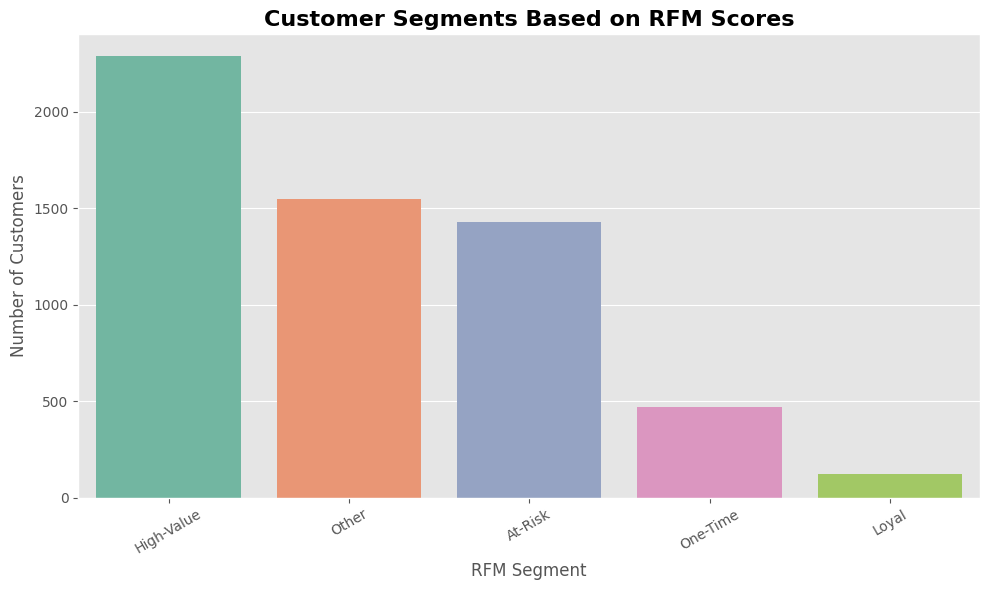

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# ✅ Paths
recency_csv = os.path.join(data_dir, '09_customer_recency.csv')  # from Q9
export_path = os.path.join(data_dir, '12_rfm_segmented_customers.csv')
plot_path = os.path.join(plot_dir, '15_rfm_segment_distribution.png')

# 📥 Load precomputed recency table
recency_df = pd.read_csv(recency_csv)

# 🧮 Compute frequency and monetary from original data
rfm_base = (
    cleaned_full_df.groupby('customer_id')
    .agg(
        frequency=('invoice_no', 'nunique'),
        monetary=('line_revenue', 'sum')
    )
    .reset_index()
)

# 🔗 Merge with recency
rfm_df = pd.merge(rfm_base, recency_df[['customer_id', 'recency_days']], on='customer_id')
rfm_df.rename(columns={'recency_days': 'recency'}, inplace=True)

# 🏷️ RFM Scoring (quartiles)
rfm_df['R'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm_df['F'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm_df['M'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# 🧮 RFM Score
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis=1)

# 🧠 Assign RFM Segment
def assign_segment(row):
    if row['RFM_Score'] >= 9:
        return 'High-Value'
    elif row['R'] >= 3 and row['F'] >= 3:
        return 'Loyal'
    elif row['R'] == 1:
        return 'At-Risk'
    elif row['F'] == 1 and row['M'] == 1:
        return 'One-Time'
    else:
        return 'Other'

rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)

# 💾 Export CSV
rfm_df.to_csv(export_path, index=False)
safe_print(f"✅ Exported: {export_path}")

# ✅ Show a sample of the exported RFM scores
rfm_preview = pd.read_csv(export_path)
safe_print("\n📋 Sample of RFM Score Table:")
display(rfm_preview.head(10))  # or .sample(10) for randomness

# 📋 Show segment frequency table before chart
safe_print("\n📋 RFM Segment Counts:")
segment_counts = rfm_df['Segment'].value_counts().sort_values(ascending=False)
display(segment_counts)

# 🎨 Plot: Segment Distribution (fixes future warning)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=segment_counts.index,
    y=segment_counts.values,
    hue=segment_counts.index,  # required for palette to apply
    palette='Set2',
    legend=False  # disables auto-legend
)
plt.title("Customer Segments Based on RFM Scores", fontsize=16, weight="bold")
plt.xlabel("RFM Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(plot_path)
safe_print(f"✅ Saved plot: {plot_path}")
plt.show()


---

### ❓ Q12: How Can We Segment Customers Based on RFM Scores?

We performed an **RFM segmentation** using SQL logic and pandas scoring to categorize customers based on their **Recency**, **Frequency**, and **Monetary** behavior.

---

#### 📋 Segment Summary:

| Segment         | Description                                       |
|-----------------|---------------------------------------------------|
| 🔴 **At-Risk**     | Long time since last purchase (low Recency)      |
| 🟢 **Loyal**       | Frequent and recent buyers (high R + F)          |
| 🟡 **High-Value**  | High spending and frequent (high M + F)          |
| 🔵 **One-Time**    | Single-purchase customers (F = 1 and M = 1)       |
| ⚪ **Other**        | Doesn’t meet specific criteria for grouping      |

---

#### 📊 Visual Insights:

- The largest group is **High-Value**, followed by **Other** and **At-Risk**.
- **Loyal** and **One-Time** customers form smaller but strategically important segments.
- This distribution reveals a **diverse customer base** with distinct behavioral patterns.

> These insights can support **personalized retention strategies**, **targeted promotions**, and the **prioritization of high-value or loyal customers**.

---


### 📋 Summary of Exploratory Data Analysis

In this notebook, we conducted a comprehensive Exploratory Data Analysis (EDA) of the cleaned Online Retail II dataset. Our analysis focused on identifying key trends in sales performance, customer behavior, and country-level insights.

Key findings include:

- **Sales Performance**:
  - The dataset contains over **776,000** transactions across **38 countries**.
  - Sales peaked in **November 2011**, with notable seasonal spikes during holiday months.
  - The **top-selling products** include **decorative and seasonal items** such as *Regency Cakestand*, *Chilli Lights*, and *T-Light Holders*, along with **popular packaging and craft items** like *Jumbo Bags* and *Paper Craft Kits*.

- **Country Insights**:
  - The **UK dominates** both in total revenue and invoice volume.
  - Excluding the UK, **Ireland, the Netherlands, and Germany** are the strongest markets by revenue.
  - Some small countries (e.g., Australia, Switzerland) showed high **average invoice values**, suggesting fewer but larger orders.

- **Customer Insights**:
  - About **72%** of customers are **repeat buyers**, while **28%** made only one purchase.
  - Top customers spent up to **£580,000**, with some placing over **300 orders**.
  - Distribution of **recency, frequency, and monetary value** highlights a small group of highly engaged, high-spending customers.

- **Product and Invoice Patterns**:
  - Most transactions involve 1–12 units per item.
  - A small number of invoices and products account for a large share of total revenue, consistent with the **Pareto principle** (80/20 rule).

---

### 💼 Business Recommendations

Based on our findings, we suggest the following actions to improve sales and customer retention:

1. **Focus on High-Value Customers**  
   Target the top spenders with personalized marketing, loyalty perks, or exclusive early access to new collections.

2. **Nurture Repeat Buyers**  
   Since a majority of customers are repeat purchasers, incentivize additional purchases through tailored promotions or bundling offers.

3. **Capitalize on Holiday Spikes**  
   Strengthen inventory and advertising campaigns in Q4, especially in October and November, to capture peak seasonal demand.

4. **Expand Beyond the UK**  
   Explore marketing and logistics strategies to grow in **Ireland**, **Netherlands**, and **Germany**, where order value and revenue are promising.

5. **Optimize Product Mix**  
   Leverage insights from top-performing products to guide future inventory planning and new product development.

6. **Monitor Inactive Customers**  
   Implement win-back campaigns for customers who haven’t purchased in several months, based on recency data.


---

## 🧩 Optional Script Entry Point

This block allows the EDA notebook to run as a standalone `.py` script.

When executed directly (e.g. from terminal or a job scheduler), all analysis steps, visualizations, and exports will be completed automatically — supporting reproducible analytics workflows.

---


In [20]:
# ✅ Optional script execution indicator for CLI use
if __name__ == "__main__":
    safe_print("📊 EDA script executed directly as a .py file — all analysis steps and exports have been completed.")


📊 EDA script executed directly as a .py file — all analysis steps and exports have been completed.
